<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4a: Predict West Nile Virus

## Part 2 - Train, Test, Spray datasets - Data Cleaning and EDA

In this notebook, we will be doing cleaning on train, test and spray datasets.
We will also be doing EDA on train and spray datasets as well.

## Contents:
- [Import Data](#Import-Data)
- [Train Data](#Train-Data)
    - [Feature Engineering](#Feature-engineering-on-Train-Dataset)
- [Test Data](#Test-Data)
- [Market Data](#Market-Data)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Save Dataset](#Save-the-Clean-Datasets)

In [1]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline


#hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading in csv files
train_df = pd.read_csv('../assets/train.csv')
test_df = pd.read_csv('../assets/test.csv')
spray_df = pd.read_csv('../assets/spray.csv')
market_df = pd.read_csv('../assets/farmer_markets.csv')

In [3]:
train_df.columns = map(str.lower, train_df.columns)
test_df.columns = map(str.lower, test_df.columns)
spray_df.columns = map(str.lower, spray_df.columns)
market_df.columns = map(str.lower, market_df.columns)

#### Train Data

In [4]:
# Viewing train data
train_df.head(2)

date                                            address  \
0  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  species  block           street  trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   

              addressnumberandstreet  latitude  longitude  addressaccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   

   nummosquitos  wnvpresent  
0             1           0  
1             1           0

In [5]:
# Viewing train info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    10506 non-null  object 
 1   address                 10506 non-null  object 
 2   species                 10506 non-null  object 
 3   block                   10506 non-null  int64  
 4   street                  10506 non-null  object 
 5   trap                    10506 non-null  object 
 6   addressnumberandstreet  10506 non-null  object 
 7   latitude                10506 non-null  float64
 8   longitude               10506 non-null  float64
 9   addressaccuracy         10506 non-null  int64  
 10  nummosquitos            10506 non-null  int64  
 11  wnvpresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [6]:
# converting object into datetime data type
train_df['date_1'] = pd.to_datetime(train_df['date'])
train_df['date'] = pd.to_datetime(train_df['date'])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    10506 non-null  datetime64[ns]
 1   address                 10506 non-null  object        
 2   species                 10506 non-null  object        
 3   block                   10506 non-null  int64         
 4   street                  10506 non-null  object        
 5   trap                    10506 non-null  object        
 6   addressnumberandstreet  10506 non-null  object        
 7   latitude                10506 non-null  float64       
 8   longitude               10506 non-null  float64       
 9   addressaccuracy         10506 non-null  int64         
 10  nummosquitos            10506 non-null  int64         
 11  wnvpresent              10506 non-null  int64         
 12  date_1                  10506 non-null  dateti

In [7]:
# checking for null values
train_df.isnull().sum().sort_values(ascending = False)

date                      0
address                   0
species                   0
block                     0
street                    0
trap                      0
addressnumberandstreet    0
latitude                  0
longitude                 0
addressaccuracy           0
nummosquitos              0
wnvpresent                0
date_1                    0
dtype: int64

In [8]:
# viewing summary stats
train_df.describe()

block      latitude     longitude  addressaccuracy  \
count  10506.000000  10506.000000  10506.000000     10506.000000   
mean      35.687797     41.841139    -87.699908         7.819532   
std       24.339468      0.112742      0.096514         1.452921   
min       10.000000     41.644612    -87.930995         3.000000   
25%       12.000000     41.732984    -87.760070         8.000000   
50%       33.000000     41.846283    -87.694991         8.000000   
75%       52.000000     41.954690    -87.627796         9.000000   
max       98.000000     42.017430    -87.531635         9.000000   

       nummosquitos    wnvpresent  
count  10506.000000  10506.000000  
mean      12.853512      0.052446  
std       16.133816      0.222936  
min        1.000000      0.000000  
25%        2.000000      0.000000  
50%        5.000000      0.000000  
75%       17.000000      0.000000  
max       50.000000      1.000000

In [9]:
# checking train shape
train_df.shape

(10506, 13)

In [10]:
# viewing train feature names
train_df.columns

Index(['date', 'address', 'species', 'block', 'street', 'trap',
       'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy',
       'nummosquitos', 'wnvpresent', 'date_1'],
      dtype='object')

Train data looks clean with no null values and no corrupted data, with all numerical values in numeric data type.

#### Feature engineering on Train Dataset

In [11]:
# creating separate variables for date
train_df['month'] = (train_df['date_1'].dt.strftime('%m')).astype(int)
train_df['year'] = (train_df['date_1'].dt.strftime('%Y')).astype(int)
train_df

date                                            address  \
0     2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1     2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2     2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3     2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4     2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
...          ...                                                ...   
10501 2013-09-26      5100 West 72nd Street, Chicago, IL 60638, USA   
10502 2013-09-26    5800 North Ridge Avenue, Chicago, IL 60660, USA   
10503 2013-09-26  1700 North Ashland Avenue, Chicago, IL 60622, USA   
10504 2013-09-26   7100 North Harlem Avenue, Chicago, IL 60631, USA   
10505 2013-09-26      4200 West 65th Street, Chicago, IL 60621, USA   

                      species  block           street  trap  \
0      CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1              CULEX RESTUANS     41   N OAK PARK AVE  T002   
2              CULEX RESTUANS     62    N MANDELL AVE  T007   
3      CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4              CULEX RESTUANS     79     W FOSTER AVE  T015   
...                       ...    ...              ...   ...   
10501  CULEX PIPIENS/RESTUANS     51        W 72ND ST  T035   
10502  CULEX PIPIENS/RESTUANS     58      N RIDGE AVE  T231   
10503  CULEX PIPIENS/RESTUANS     17    N ASHLAND AVE  T232   
10504  CULEX PIPIENS/RESTUANS     71     N HARLEM AVE  T233   
10505  CULEX PIPIENS/RESTUANS     42        W 65TH ST  T235   

                  addressnumberandstreet   latitude  longitude  \
0      4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991   
1      4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991   
2       6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279   
3        7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812   
4        7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812   
...                                  ...        ...        ...   
10501       5100  W 72ND ST, Chicago, IL  41.763733 -87.742302   
10502     5800  N RIDGE AVE, Chicago, IL  41.987280 -87.666066   
10503   1700  N ASHLAND AVE, Chicago, IL  41.912563 -87.668055   
10504    7100  N HARLEM AVE, Chicago, IL  42.009876 -87.807277   
10505       4200  W 65TH ST, Chicago, IL  41.776428 -87.627096   

       addressaccuracy  nummosquitos  wnvpresent     date_1  month  year  
0                    9             1           0 2007-05-29      5  2007  
1                    9             1           0 2007-05-29      5  2007  
2                    9             1           0 2007-05-29      5  2007  
3                    8             1           0 2007-05-29      5  2007  
4                    8             4           0 2007-05-29      5  2007  
...                ...           ...         ...        ...    ...   ...  
10501                8             6           1 2013-09-26      9  2013  
10502                8             5           0 2013-09-26      9  2013  
10503                9             1           0 2013-09-26      9  2013  
10504                9             5           0 2013-09-26      9  2013  
10505                8             1           0 2013-09-26      9  2013  

[10506 rows x 15 columns]

In [12]:
# checking after creating separate variables
train_df.head(2)

date                                            address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  species  block           street  trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   

              addressnumberandstreet  latitude  longitude  addressaccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   

   nummosquitos  wnvpresent     date_1  month  year  
0             1           0 2007-05-29      5  2007  
1             1           0 2007-05-29      5  2007

In [13]:
# checking df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    10506 non-null  datetime64[ns]
 1   address                 10506 non-null  object        
 2   species                 10506 non-null  object        
 3   block                   10506 non-null  int64         
 4   street                  10506 non-null  object        
 5   trap                    10506 non-null  object        
 6   addressnumberandstreet  10506 non-null  object        
 7   latitude                10506 non-null  float64       
 8   longitude               10506 non-null  float64       
 9   addressaccuracy         10506 non-null  int64         
 10  nummosquitos            10506 non-null  int64         
 11  wnvpresent              10506 non-null  int64         
 12  date_1                  10506 non-null  dateti

In [14]:
# looking at stats
train_df.describe()

block      latitude     longitude  addressaccuracy  \
count  10506.000000  10506.000000  10506.000000     10506.000000   
mean      35.687797     41.841139    -87.699908         7.819532   
std       24.339468      0.112742      0.096514         1.452921   
min       10.000000     41.644612    -87.930995         3.000000   
25%       12.000000     41.732984    -87.760070         8.000000   
50%       33.000000     41.846283    -87.694991         8.000000   
75%       52.000000     41.954690    -87.627796         9.000000   
max       98.000000     42.017430    -87.531635         9.000000   

       nummosquitos    wnvpresent         month          year  
count  10506.000000  10506.000000  10506.000000  10506.000000  
mean      12.853512      0.052446      7.692557   2009.576242  
std       16.133816      0.222936      1.067675      2.354645  
min        1.000000      0.000000      5.000000   2007.000000  
25%        2.000000      0.000000      7.000000   2007.000000  
50%        5.000000      0.000000      8.000000   2009.000000  
75%       17.000000      0.000000      8.000000   2011.000000  
max       50.000000      1.000000     10.000000   2013.000000

In [15]:
# check new shape
train_df.shape

(10506, 15)

In [16]:
# check new columns
train_df.columns

Index(['date', 'address', 'species', 'block', 'street', 'trap',
       'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy',
       'nummosquitos', 'wnvpresent', 'date_1', 'month', 'year'],
      dtype='object')

Train data looks clean with no null values and no corrupted data, with all numerical values in numeric data type.

In [17]:
# check the number of species in train set 
train_df['species'].value_counts()

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: species, dtype: int64

In [18]:
# check the number of unique streets in train data set
train_df['street'].value_counts()

 W OHARE AIRPORT       750
 S DOTY AVE            542
 S STONY ISLAND AVE    347
 S ASHLAND AVE         266
 N OAK PARK AVE        216
                      ... 
 S RACINE AVE            8
 W 77TH ST               7
 S LONGWOOD DR           5
 W 85TH ST               3
 S HAMLIN AVE            2
Name: street, Length: 128, dtype: int64

In [19]:
# check the number of traps in train data set
train_df['trap'].value_counts()

T900     750
T115     542
T138     314
T002     185
T135     183
        ... 
T238       7
T094B      5
T076       5
T237       3
T040       2
Name: trap, Length: 136, dtype: int64

#### Test Data 

In [20]:
# Viewing test dataset
test_df.head(2)

id        date                                            address  \
0   1  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1   2  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  species  block           street  trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   

              addressnumberandstreet  latitude  longitude  addressaccuracy  
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9  
1  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9

In [21]:
# checking test info
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      116293 non-null  int64  
 1   date                    116293 non-null  object 
 2   address                 116293 non-null  object 
 3   species                 116293 non-null  object 
 4   block                   116293 non-null  int64  
 5   street                  116293 non-null  object 
 6   trap                    116293 non-null  object 
 7   addressnumberandstreet  116293 non-null  object 
 8   latitude                116293 non-null  float64
 9   longitude               116293 non-null  float64
 10  addressaccuracy         116293 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 9.8+ MB


In [22]:
# converting object into datetime data type
test_df['date_1'] = pd.to_datetime(test_df['date'])
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      116293 non-null  int64         
 1   date                    116293 non-null  object        
 2   address                 116293 non-null  object        
 3   species                 116293 non-null  object        
 4   block                   116293 non-null  int64         
 5   street                  116293 non-null  object        
 6   trap                    116293 non-null  object        
 7   addressnumberandstreet  116293 non-null  object        
 8   latitude                116293 non-null  float64       
 9   longitude               116293 non-null  float64       
 10  addressaccuracy         116293 non-null  int64         
 11  date_1                  116293 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(

In [23]:
# checking for null values
test_df.isnull().sum().sort_values(ascending = False)

id                        0
date                      0
address                   0
species                   0
block                     0
street                    0
trap                      0
addressnumberandstreet    0
latitude                  0
longitude                 0
addressaccuracy           0
date_1                    0
dtype: int64

In [24]:
# looking at summary stats
test_df.describe()

id          block       latitude      longitude  \
count  116293.000000  116293.000000  116293.000000  116293.000000   
mean    58147.000000      41.131100      41.849389     -87.693658   
std     33571.041765      24.864726       0.106593       0.080699   
min         1.000000      10.000000      41.644612     -87.930995   
25%     29074.000000      18.000000      41.753411     -87.750938   
50%     58147.000000      39.000000      41.862292     -87.694991   
75%     87220.000000      61.000000      41.951866     -87.648860   
max    116293.000000      98.000000      42.017430     -87.531635   

       addressaccuracy  
count    116293.000000  
mean          7.954357  
std           1.252733  
min           3.000000  
25%           8.000000  
50%           8.000000  
75%           9.000000  
max           9.000000

In [25]:
# checking test df shape
test_df.shape

(116293, 12)

In [26]:
# checking test df columns
test_df.columns

Index(['id', 'date', 'address', 'species', 'block', 'street', 'trap',
       'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy',
       'date_1'],
      dtype='object')

Train data looks clean with no null values and no corrupted data, with all numerical values in numeric data type.

In [27]:
#### Feature engineering on Train Dataset

In [28]:
# creating new variables in test df
test_df['month'] = (test_df['date_1'].dt.strftime('%m')).astype(int)
test_df['year'] = (test_df['date_1'].dt.strftime('%Y')).astype(int)
test_df

id        date                                            address  \
0            1  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1            2  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2            3  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
3            4  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
4            5  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
...        ...         ...                                                ...   
116288  116289  2014-10-02    2100 North Cannon Drive, Chicago, IL 60614, USA   
116289  116290  2014-10-02    2100 North Cannon Drive, Chicago, IL 60614, USA   
116290  116291  2014-10-02    2100 North Cannon Drive, Chicago, IL 60614, USA   
116291  116292  2014-10-02    2100 North Cannon Drive, Chicago, IL 60614, USA   
116292  116293  2014-10-02    2100 North Cannon Drive, Chicago, IL 60614, USA   

                       species  block           street   trap  \
0       CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE   T002   
1               CULEX RESTUANS     41   N OAK PARK AVE   T002   
2                CULEX PIPIENS     41   N OAK PARK AVE   T002   
3             CULEX SALINARIUS     41   N OAK PARK AVE   T002   
4              CULEX TERRITANS     41   N OAK PARK AVE   T002   
...                        ...    ...              ...    ...   
116288        CULEX SALINARIUS     21      N CANNON DR  T054C   
116289         CULEX TERRITANS     21      N CANNON DR  T054C   
116290          CULEX TARSALIS     21      N CANNON DR  T054C   
116291       UNSPECIFIED CULEX     21      N CANNON DR  T054C   
116292         CULEX ERRATICUS     21      N CANNON DR  T054C   

                   addressnumberandstreet   latitude  longitude  \
0       4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991   
1       4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991   
2       4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991   
3       4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991   
4       4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991   
...                                   ...        ...        ...   
116288     2100  N CANNON DR, Chicago, IL  41.925652 -87.633590   
116289     2100  N CANNON DR, Chicago, IL  41.925652 -87.633590   
116290     2100  N CANNON DR, Chicago, IL  41.925652 -87.633590   
116291     2100  N CANNON DR, Chicago, IL  41.925652 -87.633590   
116292     2100  N CANNON DR, Chicago, IL  41.925652 -87.633590   

        addressaccuracy     date_1  month  year  
0                     9 2008-06-11      6  2008  
1                     9 2008-06-11      6  2008  
2                     9 2008-06-11      6  2008  
3                     9 2008-06-11      6  2008  
4                     9 2008-06-11      6  2008  
...                 ...        ...    ...   ...  
116288                8 2014-10-02     10  2014  
116289                8 2014-10-02     10  2014  
116290                8 2014-10-02     10  2014  
116291                8 2014-10-02     10  2014  
116292                8 2014-10-02     10  2014  

[116293 rows x 14 columns]

In [29]:
# check the number of species in test set - more species detected compared to train data
test_df['species'].value_counts()

CULEX PIPIENS/RESTUANS    15359
CULEX RESTUANS            14670
CULEX PIPIENS             14521
CULEX SALINARIUS          14355
CULEX TERRITANS           14351
CULEX TARSALIS            14347
UNSPECIFIED CULEX         14345
CULEX ERRATICUS           14345
Name: species, dtype: int64

In [30]:
# check the number of unique streets in test data set - more streets present in test data set
test_df['street'].value_counts()

 N OAK PARK AVE        1617
 N PULASKI RD          1564
 N CANNON DR           1552
 S ASHLAND AVE         1531
 S STONY ISLAND AVE    1528
                       ... 
 N RICHMOND ST          760
 W HIGGINS AVE          760
 W FARWELL AVE          760
 S WESTERN AVE          760
 W 37TH PL.             760
Name: street, Length: 139, dtype: int64

In [31]:
# check the number of traps in test data set - similarly, more streets means more traps
test_df['trap'].value_counts()

T009     1528
T035     1520
T900     1468
T002      857
T008      822
         ... 
T129      760
T218A     760
T162      760
T050      760
T005      760
Name: trap, Length: 149, dtype: int64

#### Market Data

In [32]:
# checking market data
# data was pull from chicago offical data website
market_df.head()

location         intersection        day start time  \
0                       Edgewater   Broadway & Norwood   Saturday    8:00 AM   
1           Homegrown Bronzeville        343 E 51st St     Sunday    9:00 AM   
2  Covenant Bank - North Lawndale     1111 S Homan Ave  Wednesday    8:00 AM   
3    Jefferson Park Sunday Market  5216 W Lawrence Ave     Sunday   10:00 AM   
4                      Bridgeport       35th & Wallace   Saturday    7:00 AM   

  end time  start date    end date                              website  \
0  1:00 PM  06/09/2012  10/13/2012                                  NaN   
1  1:00 PM  06/10/2012  10/28/2012        http://www.greenyouthfarm.com   
2  1:00 PM  06/13/2012  10/10/2012                                  NaN   
3  2:00 PM  06/24/2012  10/21/2012               http://www.jpna.net/FM   
4  1:00 PM  06/16/2012  10/06/2012  http://www.chicagofarmersmarkets.us   

          type link accepted   latitude  longitude  \
0  Independent            NO  41.991823 -87.660323   
1  Independent           YES  41.801971 -87.617688   
2  Independent           YES  41.867803 -87.710441   
3  Independent            NO  41.968006 -87.758347   
4       Weekly           YES  41.830815 -87.641235   

                           map  
0   (41.9918227, -87.66032349)  
1  (41.80197062, -87.61768784)  
2  (41.86780306, -87.71044099)  
3  (41.96800571, -87.75834697)  
4  (41.83081542, -87.64123528)

## Exploratory Data Analysis

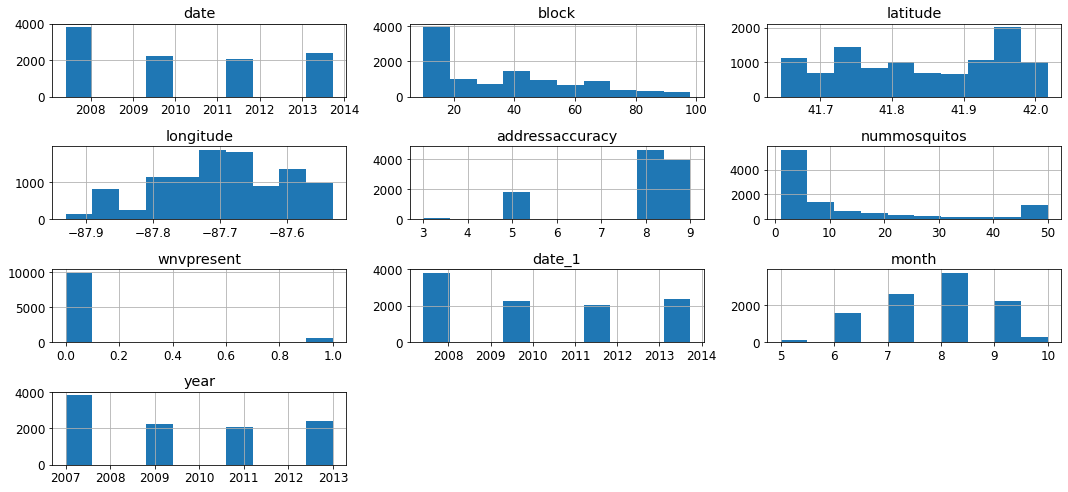

In [33]:
# parameter setting for plots
plt.rcParams["figure.figsize"] = (15,7)
plt.rcParams['font.size'] = 12
plt.rcParams["figure.autolayout"] = True
# plt.style.use('seaborn-whitegrid')

# verify data distribution of numeric data in train dataset
train_df.hist();
plt.savefig('../images/histo_overall.png')

Train data set contains data from year 2007, 2009, 2011 and 2013. From the histogram above, 2007 has the highest number of cases while 2013 seems to increase by about 18% from 2011

The peak of the registered cases appears to be in August. However, will have to analyze further by year to confirm the trend of mosquitos breeding.

#### Ratio of Mosquitoes with WNV Positive vs WNV Negative

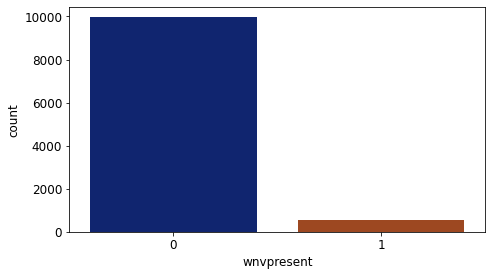

In [34]:
# Visualizing ratio
plt.rcParams["figure.figsize"] = (7,4)
plt.rcParams['font.size'] = 12

sns.countplot(x = 'wnvpresent',data = train_df ,palette='dark');
plt.savefig('../images/ratio.png')

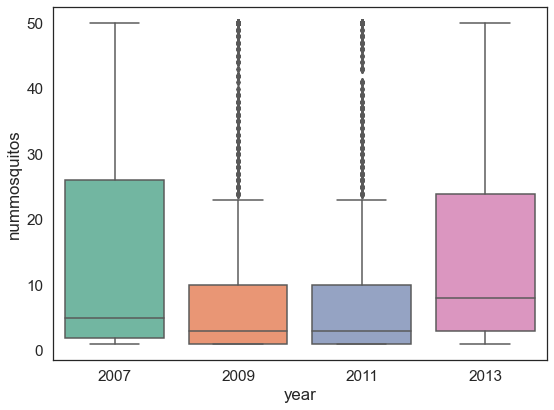

In [35]:
# Plot boxplots to identify median outliers
sns.set(font_scale=1.4)
sns.set_style(style='white')
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.boxplot(x='year', y='nummosquitos', data=train_df, palette='Set2');
plt.savefig('../images/median&outliers.png')

There appear to be much higher outliers detected in 2009 and 2011 while the median is about 3 mosquitos. In 2013, the median of trapped mosquitos jumped by at least 50%.

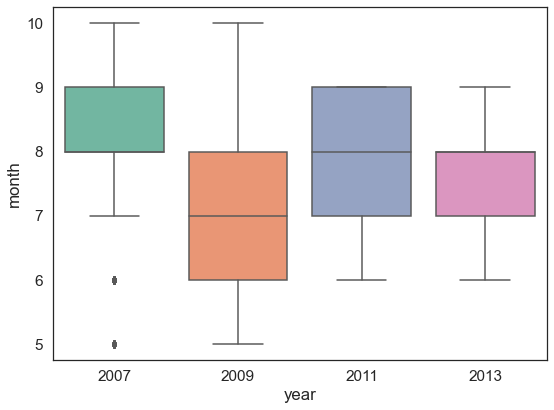

In [36]:
# Visualizing spread of cases in months over the years
fig, ax = plt.subplots(figsize=(8,6))
sns.set_style(style='white')
ax = sns.boxplot(x='year', y='month', data=train_df, palette='Set2');
plt.savefig('../images/spreadofcasesovertheyears.png')

In 2007, about 50% of the cases centered around Aug. 2009 has about 25% cases started as early as May. In 2011, the cases were spread across 3 months starting from Jun.  While in 2013, 50% of the cases happened during Jul.

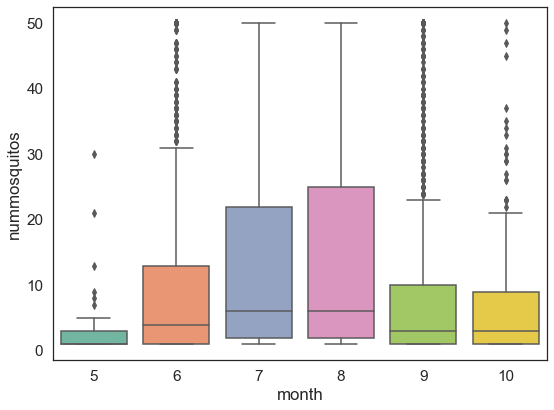

In [37]:
# visualizing detection month
fig, ax = plt.subplots(figsize=(8,6))
sns.set_style(style='white')
# Set the palette using the name of a palette:

ax = sns.boxplot(x='month', y='nummosquitos', data=train_df, palette='Set2');

In summary, the detection of mosquitos can start as early as in May, and end in October. The peak is generally in Jul/Aug where the weather should be at its hottest and dry as well.

In [38]:
# plot by the count of virus, 0 being none, 1 being present
train_df.groupby('wnvpresent')['nummosquitos'].count()

wnvpresent
0    9955
1     551
Name: nummosquitos, dtype: int64

In [39]:
# proportion of wn virus present in all trapped mosquitos
train_df['wnvpresent'].mean()

0.05244622120692937

Only about 5% of mosquitos caught had the west nile virus

In [40]:
# looking at  mosquito distribution by numbers
type_pos = train_df.groupby('species')['wnvpresent'].count().sort_values(ascending=False)
type_pos

species
CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: wnvpresent, dtype: int64

Mosquito species that were detected to have most West Nile virus are Culex Pipiens and Restuans.

#### Looking at mosquito type and count over the years

In [41]:
year_mozzie = train_df.groupby(['year','species'], as_index=False).sum().reindex()

In [42]:
months_only_2007 = train_df[train_df['year'] == 2007]
months_only_2009 = train_df[train_df['year'] == 2009]
months_only_2011 = train_df[train_df['year'] == 2011]
months_only_2013 = train_df[train_df['year'] == 2013]

In [43]:
month_mozzie_2007 = months_only_2007.groupby(['month','species'], as_index=False).sum()
month_mozzie_2009 = months_only_2009.groupby(['month','species'], as_index=False).sum()
month_mozzie_2011 = months_only_2011.groupby(['month','species'], as_index=False).sum()
month_mozzie_2013 = months_only_2013.groupby(['month','species'], as_index=False).sum()

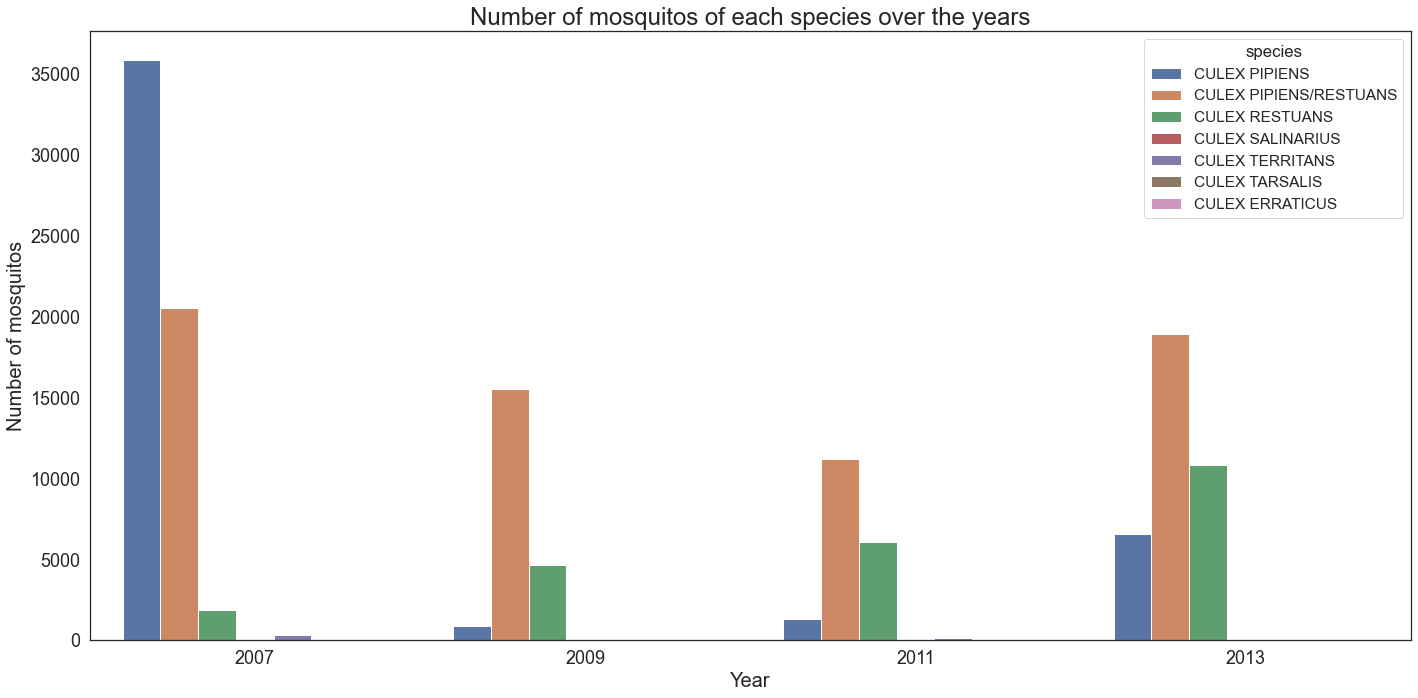

In [44]:
# Visualizing mosquito count over the years by species
plt.figure(figsize=(20,10))
palette ={"CULEX PIPIENS": "C0", "CULEX PIPIENS/RESTUANS": "C1", "CULEX RESTUANS": "C2", "CULEX SALINARIUS": "C3", 
          "CULEX TERRITANS": "C4", "CULEX TARSALIS": "C5", "CULEX ERRATICUS": "C6"}
ax = sns.barplot(x = 'year', y='nummosquitos', hue = 'species', data = year_mozzie, palette=palette)
ax.tick_params(labelsize = 18)
plt.title('Number of mosquitos of each species over the years',fontsize=24)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of mosquitos', fontsize=20)
plt.savefig('../images/mosquitocountsovertheyearsbyspecies.png')

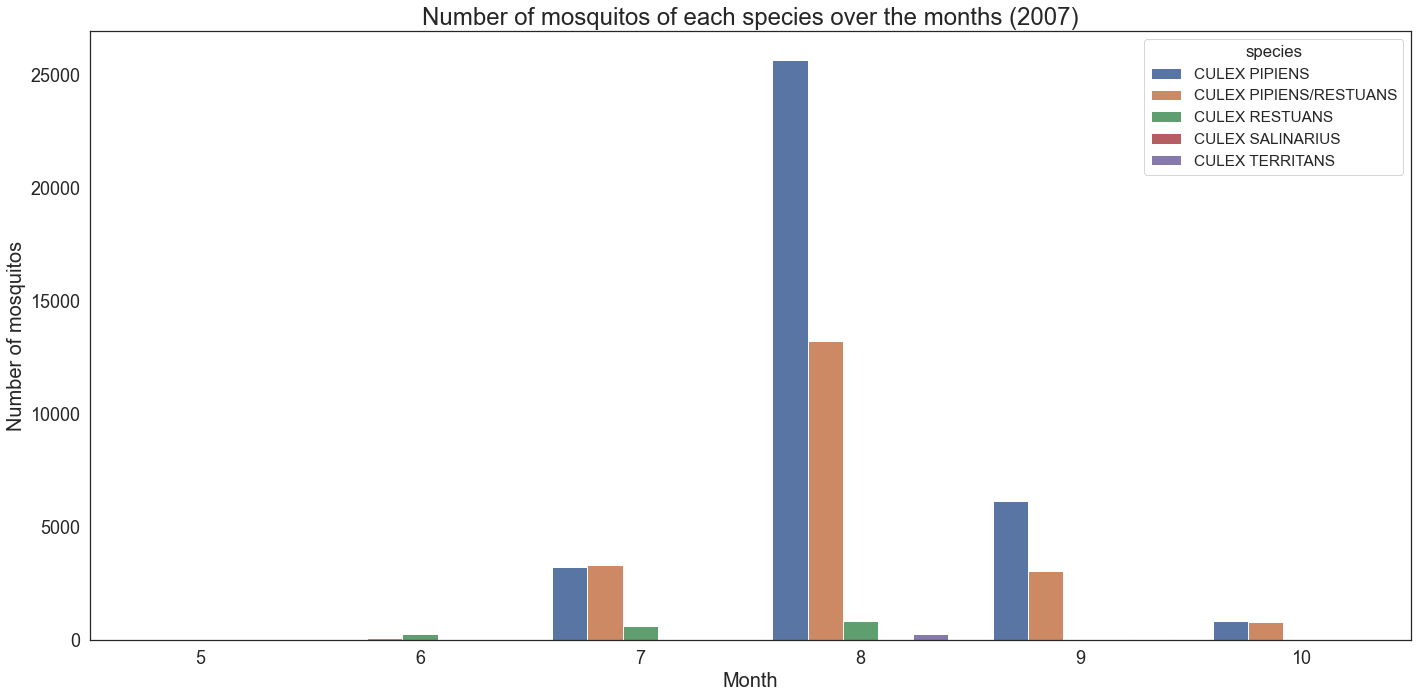

In [45]:
# Visualization for 2007 only
plt.figure(figsize=(20,10)) 
ax = sns.barplot(x = 'month', y='nummosquitos', hue = 'species', data = month_mozzie_2007, palette=palette)
ax.tick_params(labelsize = 18)
plt.title('Number of mosquitos of each species over the months (2007)',fontsize=24)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Number of mosquitos', fontsize=20)
plt.savefig('../images/mosquitocountsovertheyearsbyspecies(2007).png')

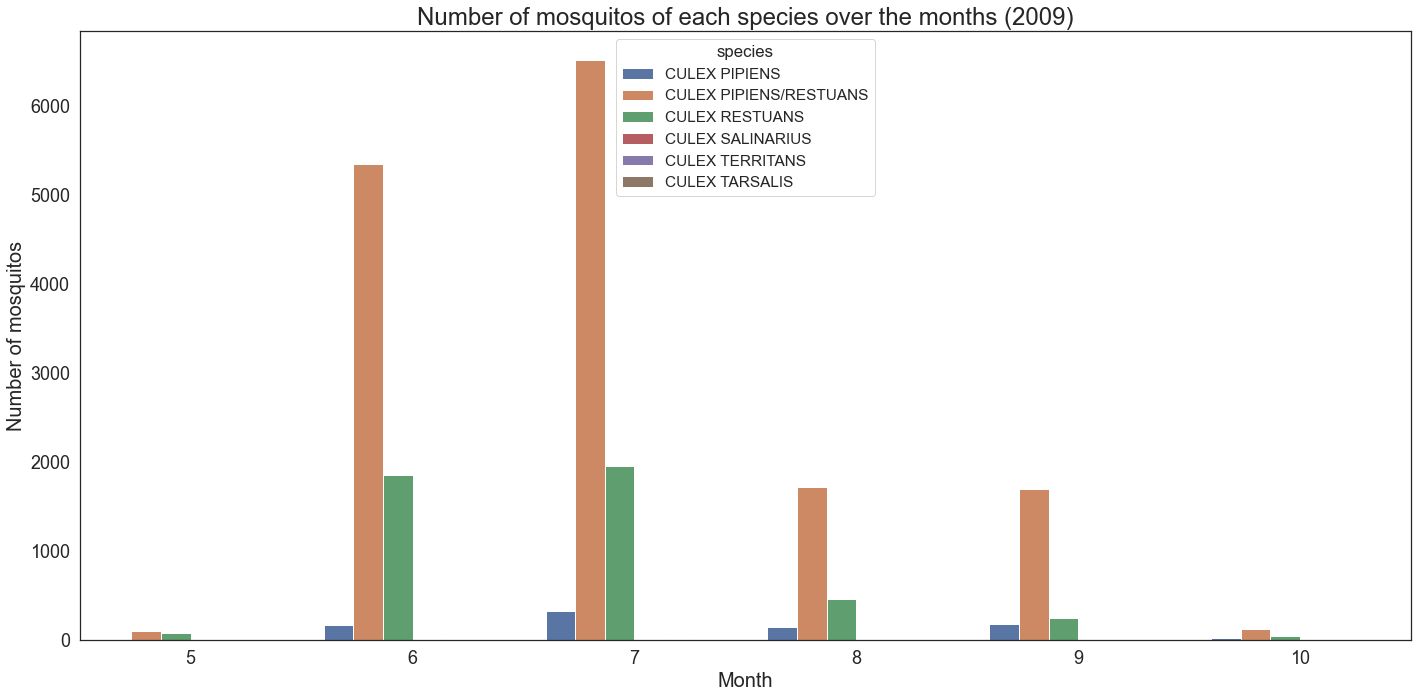

In [46]:
# Visualization for 2009 only
plt.figure(figsize=(20,10))
ax = sns.barplot(x = 'month', y='nummosquitos', hue = 'species', data = month_mozzie_2009, palette = palette)
ax.tick_params(labelsize = 18)
plt.title('Number of mosquitos of each species over the months (2009)',fontsize=24)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Number of mosquitos', fontsize=20)
plt.savefig('../images/mosquitocountsovertheyearsbyspecies(2009).png')

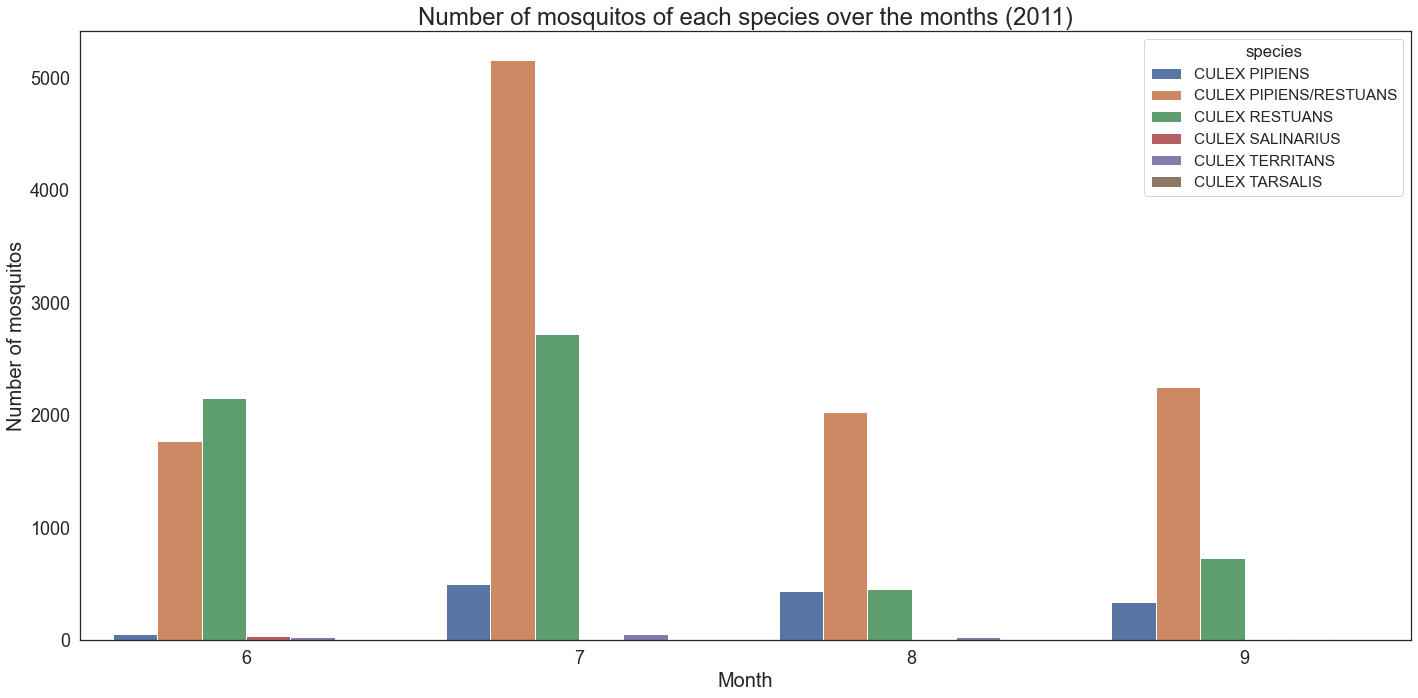

In [47]:
# Visualization for 2011
plt.figure(figsize=(20,10))
ax = sns.barplot(x = 'month', y='nummosquitos', hue = 'species', data = month_mozzie_2011, palette = palette)
ax.tick_params(labelsize = 18)
plt.title('Number of mosquitos of each species over the months (2011)',fontsize=24)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Number of mosquitos', fontsize=20)
plt.savefig('../images/mosquitocountsovertheyearsbyspecies(2011).png')

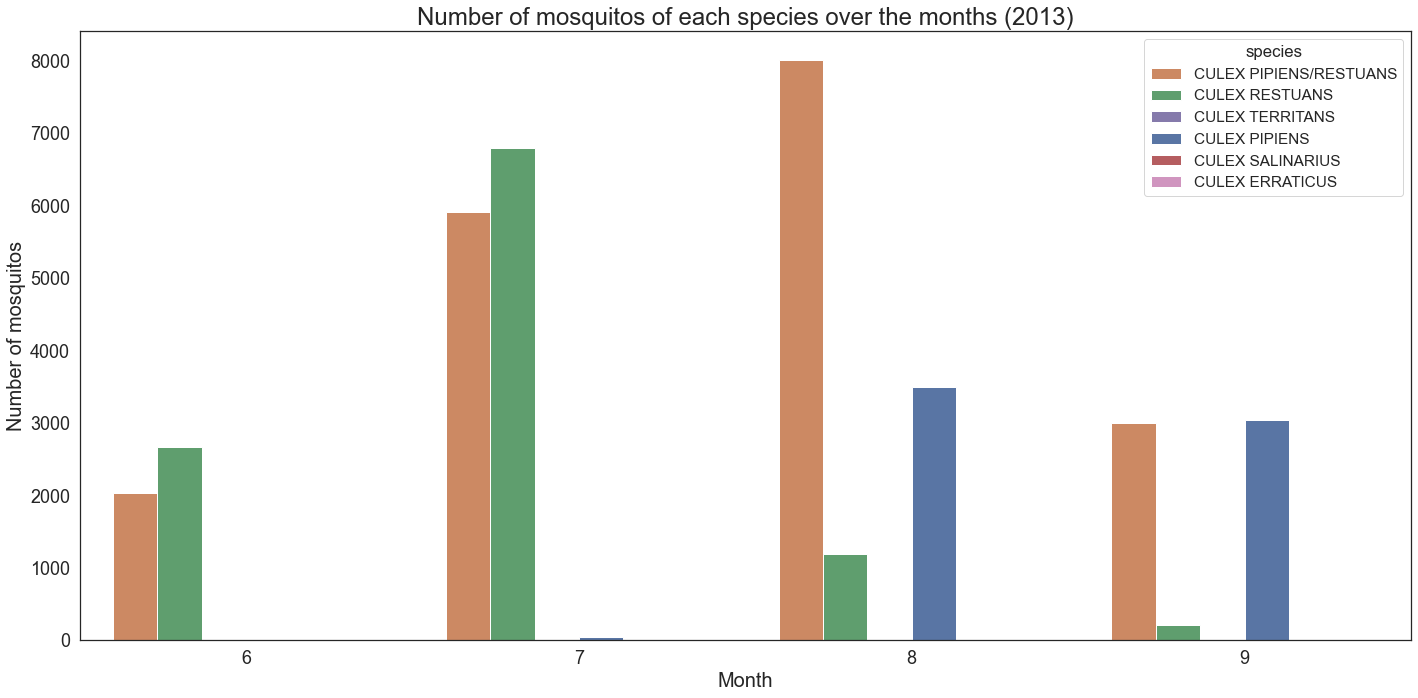

In [48]:
# Visualization for 2013
plt.figure(figsize=(20,10))
ax = sns.barplot(x = 'month', y='nummosquitos', hue = 'species', data = month_mozzie_2013, palette = palette)
ax.tick_params(labelsize = 18)
plt.title('Number of mosquitos of each species over the months (2013)',fontsize=24)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Number of mosquitos', fontsize=20)
plt.savefig('../images/mosquitocountsovertheyearsbyspecies(2013).png')

From 2007 to 2009 data, it can be seen that mosquito activity picks up significantly in Jun/ Jul then drops significantly from Sep to a miniscule amount in Oct.
Data for mosquito collection only occurs from May to Oct in 2007 and 2009 and then dropped to Jun to Sep in 2011 and 2013.

This reaffirms that mosquitoes are very active in the summer months.

In [49]:
month_wnv_2007 = months_only_2007.groupby(['month','wnvpresent'], as_index=False).sum()
month_wnv_2009 = months_only_2009.groupby(['month','wnvpresent'], as_index=False).sum()
month_wnv_2011 = months_only_2011.groupby(['month','wnvpresent'], as_index=False).sum()
month_wnv_2013 = months_only_2013.groupby(['month','wnvpresent'], as_index=False).sum()

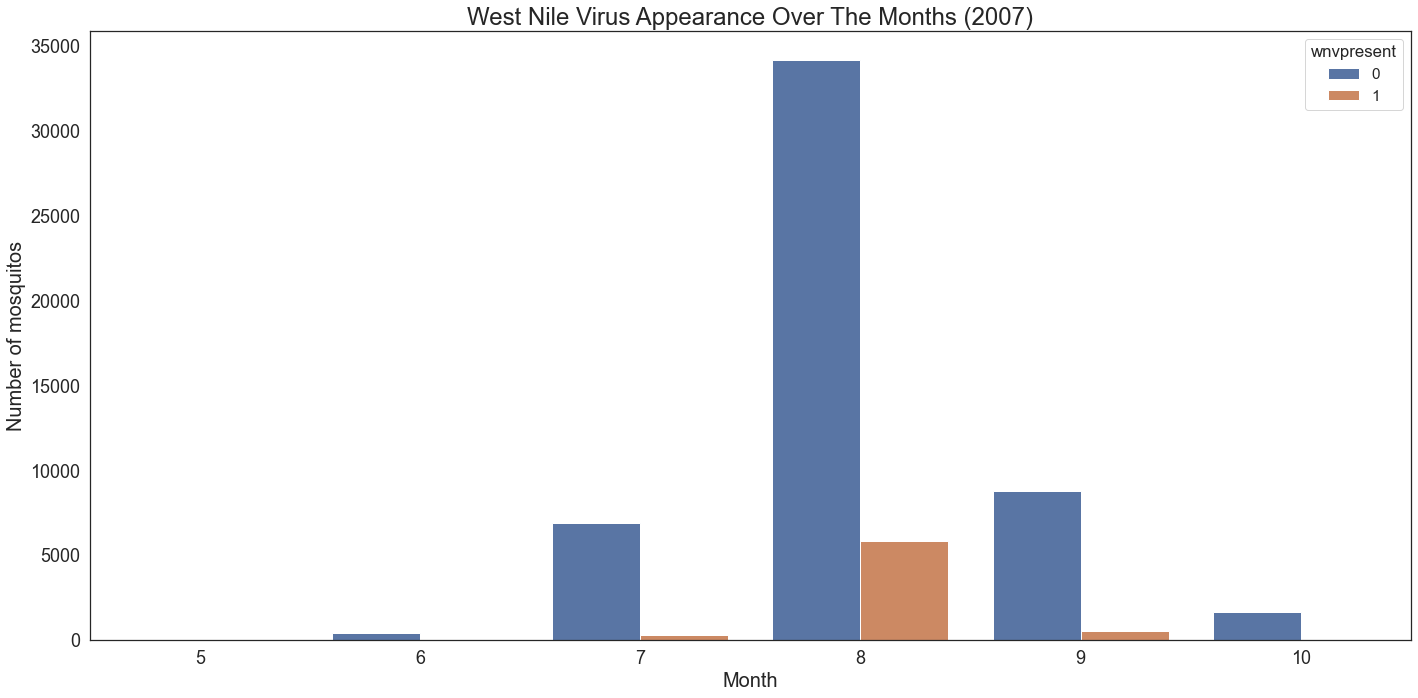

In [50]:
# Visualization of WNV presence over the months in 2007
plt.figure(figsize=(20,10))
ax = sns.barplot(x = 'month', y='nummosquitos', hue = 'wnvpresent', data = month_wnv_2007)
ax.tick_params(labelsize = 18)
plt.title('West Nile Virus Appearance Over The Months (2007)',fontsize=24)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Number of mosquitos', fontsize=20)
plt.savefig('../images/wnvoverthemonths(2007).png')

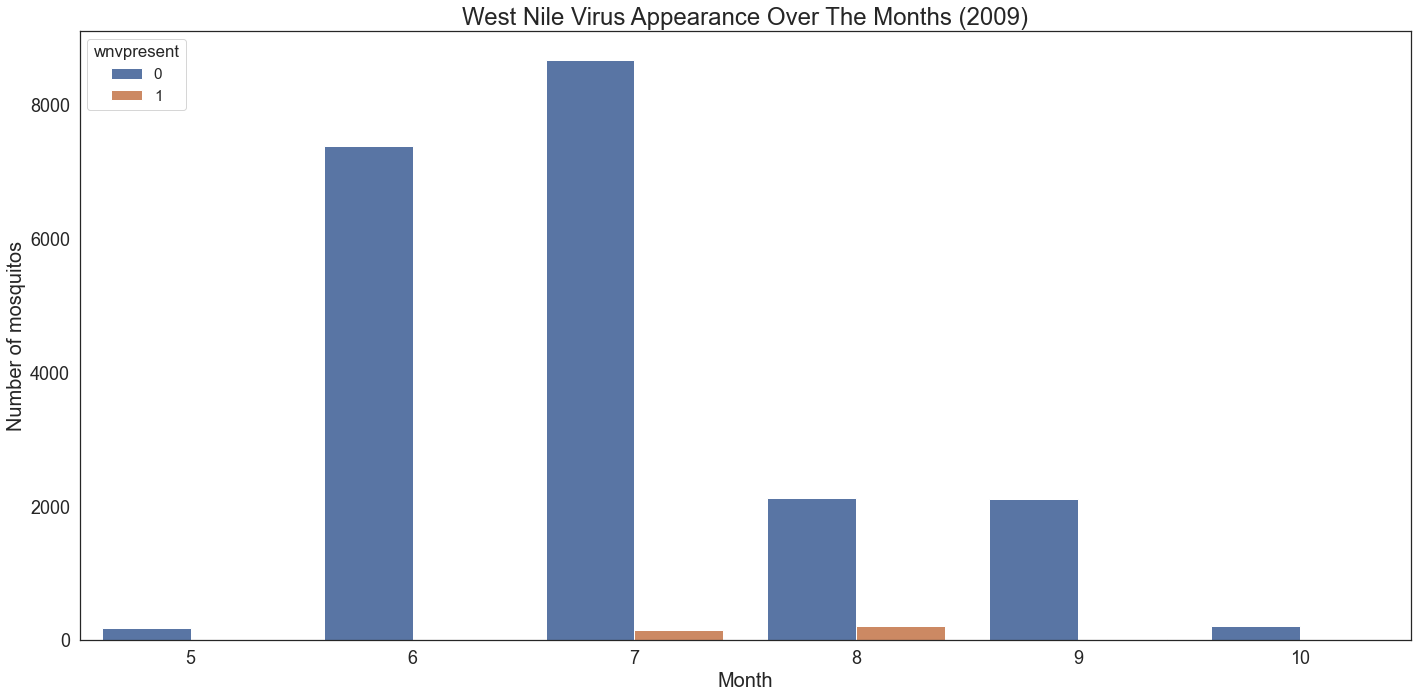

In [51]:
# Visualization of WNV presence over the months in 2009
plt.figure(figsize=(20,10))
ax = sns.barplot(x = 'month', y='nummosquitos', hue = 'wnvpresent', data = month_wnv_2009)
ax.tick_params(labelsize = 18)
plt.title('West Nile Virus Appearance Over The Months (2009)',fontsize=24)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Number of mosquitos', fontsize=20)
plt.savefig('../images/wnvoverthemonths(2009).png')

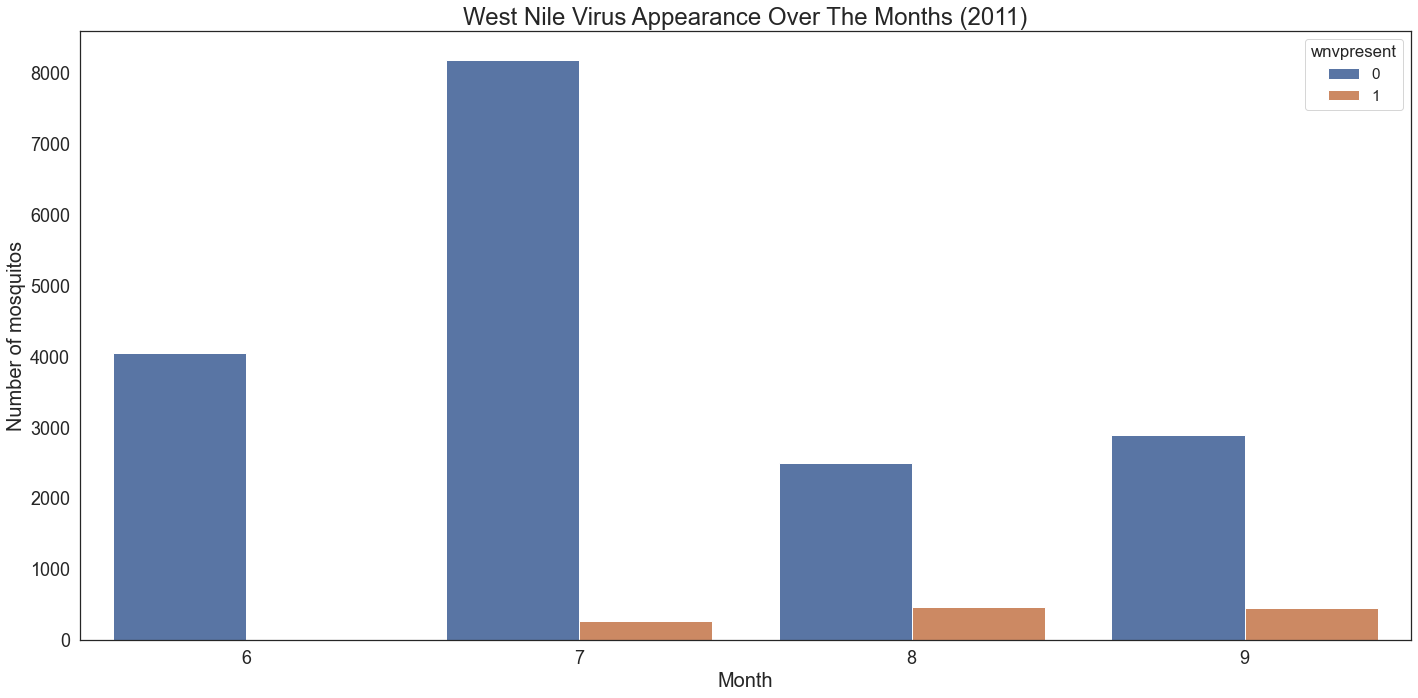

In [52]:
# Visualization of WNV presence over the months in 2011
plt.figure(figsize=(20,10))
ax = sns.barplot(x = 'month', y='nummosquitos', hue = 'wnvpresent', data = month_wnv_2011)
ax.tick_params(labelsize = 18)
plt.title('West Nile Virus Appearance Over The Months (2011)',fontsize=24)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Number of mosquitos', fontsize=20)
plt.savefig('../images/wnvoverthemonths(2011).png')

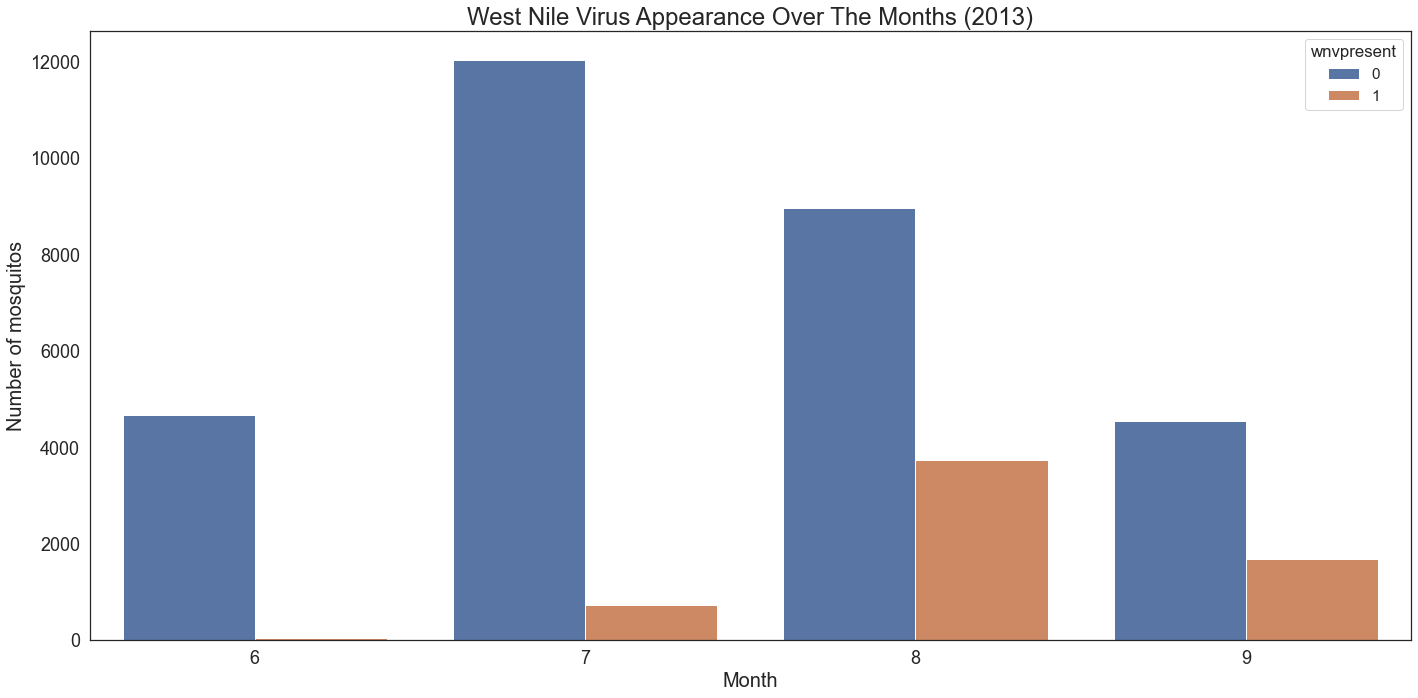

In [53]:
# Visualization of WNV presence over the months in 2013
plt.figure(figsize=(20,10))
ax = sns.barplot(x = 'month', y='nummosquitos', hue = 'wnvpresent', data = month_wnv_2013)
ax.tick_params(labelsize = 18)
plt.title('West Nile Virus Appearance Over The Months (2013)',fontsize=24)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Number of mosquitos', fontsize=20)
plt.savefig('../images/wnvoverthemonths(2013).png')

From the graphs of the presence of the West Nile Virus in mosquitoes, it can be seen that the mosquitoes hatched first in June, then started carrying the virus from July onwards.

This correlates the fact that mosquitoes are not born with the disease and does not pass on the disease in their eggs.  They only carry the disease after feeding on birds infected with the West Nile Virus.

Background research also shows that the mosquitoes also bite back on other birds, causing the virus to spread back to these other birds as well.

#### Distribution of traps by streets

In [54]:
# create a dataframe that is grouped by traps
street_trap_df = pd.DataFrame(train_df.groupby('trap')['street'])
street_trap_df

0                                                  1
0    T001  136      N TRIPP AVE
359      N TRIPP AVE
487 ...
1    T002  0         N OAK PARK AVE
1         N OAK PARK ...
2    T003  137       N MILWAUKEE AVE
248       N MILWAUKE...
3    T004  388      W SUNNYSIDE AVE
758      W SUNNYSIDE ...
4    T005  270      W ROSCOE ST
1053     W ROSCOE ST
1054...
..    ...                                                ...
131  T236  7466      N MCCLELLAN AVE
7467      N MCCLELLA...
132  T237  7635     W 85TH ST
7820     W 85TH ST
7941    ...
133  T238  7821     W 77TH ST
7822     W 77TH ST
7823    ...
134  T900  3868      W OHARE AIRPORT
3869      W OHARE AI...
135  T903  3975      W OHARE
3976      W OHARE
4053      ...

[136 rows x 2 columns]

In [55]:
# rename the new colum
street_trap_df.rename({0:'trap', 1:'street'}, axis=1, inplace=True)


In [56]:
street_trap_df['trap'].value_counts(ascending=False)

T222    1
T031    1
T097    1
T066    1
T060    1
       ..
T048    1
T009    1
T150    1
T152    1
T062    1
Name: trap, Length: 136, dtype: int64

As seen from the table above, the trap numbering is unique to the designated street.

In [57]:
pd.set_option('display.max_rows', 500)

# show dataframe grouped by year, trap, street, and location of traps, sort by number of traps
pd.DataFrame(train_df.groupby(['year','trap','street','latitude', 'longitude'])['street'].count()
             .sort_values(ascending=False))


street
year trap  street                         latitude  longitude         
2007 T115   S DOTY AVE                    41.673408 -87.599862     408
2009 T900   W OHARE AIRPORT               41.974689 -87.890615     273
2011 T900   W OHARE AIRPORT               41.974689 -87.890615     239
2013 T900   W OHARE AIRPORT               41.974689 -87.890615     238
2007 T138   S STONY ISLAND AVE            41.726465 -87.585413     232
     T086   W 113TH ST                    41.688324 -87.676709      86
     T103   S AVENUE L                    41.702724 -87.536497      83
     T128   E 105TH ST                    41.704572 -87.565666      68
2011 T903   W OHARE                       41.957799 -87.930995      64
2007 T212   E 118TH ST                    41.680946 -87.535198      61
     T200   S TORRENCE AVE                41.678618 -87.559308      60
2013 T002   N OAK PARK AVE                41.954690 -87.800991      60
2007 T135   W 127TH PL                    41.662014 -87.724608      59
2009 T135   W 127TH PL                    41.662014 -87.724608      59
     T903   W OHARE                       41.957799 -87.930995      59
     T054   N CANNON DR                   41.921965 -87.632085      56
2011 T114   S KOLMAR                      41.798697 -87.736812      51
2007 T096   W 89TH ST                     41.731922 -87.677512      50
2011 T151    W ARMITAGE AVENUE            41.916265 -87.800515      50
2009 T048   W ROOSEVELT                   41.867108 -87.654224      49
2007 T002   N OAK PARK AVE                41.954690 -87.800991      49
     T158   W 116TH ST                    41.682587 -87.707973      49
2009 T031   S CENTRAL AVE                 41.801498 -87.763416      48
2013 T054   N CANNON DR                   41.921965 -87.632085      47
2009 T115   S DOTY AVE                    41.673408 -87.599862      47
     T002   N OAK PARK AVE                41.954690 -87.800991      46
2013 T030   N CENTRAL PARK DR             41.899230 -87.716788      45
     T115   S DOTY AVE                    41.673408 -87.599862      45
2007 T215   E 115TH ST                    41.686398 -87.531635      45
2013 T158   W 116TH ST                    41.682587 -87.707973      44
2009 T159   S CARPENTER ST                41.732984 -87.649642      44
2011 T027   N PULASKI RD                  41.984809 -87.728492      44
2007 T065   W 63RD ST                     41.778297 -87.752411      44
2009 T225   S KOSTNER AVE                 41.743402 -87.731435      44
2013 T227   E 91ST PL                     41.728495 -87.600963      44
2009 T200   S TORRENCE AVE                41.678618 -87.559308      43
2011 T031   S CENTRAL AVE                 41.801498 -87.763416      43
2009 T073   E 67TH ST                     41.773215 -87.600880      42
2013 T221   E 130TH ST                    41.659112 -87.538693      42
2011 T115   S DOTY AVE                    41.673408 -87.599862      42
2013 T009   W HIGGINS RD                  41.992478 -87.862995      41
2009 T209   S BRANDON                     41.740641 -87.546587      41
2007 T090   S ASHLAND AVE                 41.868077 -87.666901      41
2009 T090   S ASHLAND AVE                 41.868077 -87.666901      41
2013 T008   N MOSELL AVE                  42.008314 -87.777921      41
2009 T158   W 116TH ST                    41.682587 -87.707973      40
     T220   N CAMPBELL AVE                41.963976 -87.691810      39
2007 T145   N ASHLAND AVE OVERPASS        41.878114 -87.629798      39
2009 T094   W 95TH ST                     41.720848 -87.666014      39
2007 T016   N OKETO AVE                   42.011601 -87.811506      39
2013 T209   S BRANDON                     41.740641 -87.546587      38
2007 T008   N MOSELL AVE                  42.008314 -87.777921      38
2011 T003   N MILWAUKEE AVE               41.964242 -87.757639      38
     T223   N MONT CLARE AVE              41.973845 -87.805059      37
     T226   W GARFIELD BLVD               41.793818 -87.654234      37
2013 T012   N LEM

W Ohare Airport is the highest ranking street in terms of number of traps across 2009, 2011 and 2013.

In [58]:
# show dataframe grouped by year, trap, street, and location of traps, sort by number of mosquitos
pd.DataFrame(train_df.groupby(['year','street','latitude', 'longitude'])['nummosquitos','wnvpresent'].sum()
             .sort_values(by='nummosquitos', ascending=False))


nummosquitos  \
year street                         latitude  longitude                  
2007  S DOTY AVE                    41.673408 -87.599862         19134   
      S STONY ISLAND AVE            41.726465 -87.585413          9321   
2013  W OHARE AIRPORT               41.974689 -87.890615          5689   
2009  W OHARE AIRPORT               41.974689 -87.890615          5488   
2011  W OHARE AIRPORT               41.974689 -87.890615          4209   
2007  S AVENUE L                    41.702724 -87.536497          2988   
      E 105TH ST                    41.704572 -87.565666          2532   
2013  N OAK PARK AVE                41.954690 -87.800991          1792   
2007  E 118TH ST                    41.680946 -87.535198          1785   
2013  N CENTRAL PARK DR             41.899230 -87.716788          1355   
2011  S KOLMAR                      41.798697 -87.736812          1313   
2007  W 113TH ST                    41.688324 -87.676709          1312   
      W 127TH PL                    41.662014 -87.724608          1235   
2009  W 127TH PL                    41.662014 -87.724608          1178   
2013  N MOSELL AVE                  42.008314 -87.777921          1162   
      W 116TH ST                    41.682587 -87.707973          1140   
      S DOTY AVE                    41.673408 -87.599862          1134   
      W HIGGINS RD                  41.992478 -87.862995          1085   
2009  W OHARE                       41.957799 -87.930995          1079   
      S KOSTNER AVE                 41.743402 -87.731435          1060   
2011  W OHARE                       41.957799 -87.930995          1054   
2013  E 91ST PL                     41.728495 -87.600963          1011   
      E 130TH ST                    41.659112 -87.538693           934   
2007  S TORRENCE AVE                41.678618 -87.559308           899   
      W 116TH ST                    41.682587 -87.707973           892   
2011  S DOTY AVE                    41.673408 -87.599862           871   
2007  E 115TH ST                    41.686398 -87.531635           852   
2011   W ARMITAGE AVENUE            41.916265 -87.800515           845   
2013  S KOSTNER AVE                 41.743402 -87.731435           820   
2009  N OAK PARK AVE                41.954690 -87.800991           818   
2011  N MONT CLARE AVE              41.973845 -87.805059           797   
2007  N OAK PARK AVE                41.954690 -87.800991           740   
2009  W ROOSEVELT                   41.867108 -87.654224           739   
2013  S KEDZIE AVE                  41.771660 -87.703047           706   
      N HARLEM AVE                  42.009876 -87.807277           665   
      S CARPENTER ST                41.732984 -87.649642           645   
      W FULLERTON AVE               41.923738 -87.785288           643   
      W ROOSEVELT                   41.867108 -87.654224           640   
2007  W 63RD ST                     41.778297 -87.752411           637   
      N OKETO AVE                   42.011601 -87.811506           633   
2009  S CENTRAL AVE                 41.801498 -87.763416           621   
2013  N LEMONT AVE                  41.991429 -87.747113           607   
      S ASHLAND AVE                 41.868077 -87.666901           594   
2007  W 89TH ST                     41.731922 -87.677512           578   
2013   W ARMITAGE AVENUE            41.916265 -87.800515           572   
2011  N MILWAUKEE AVE               41.964242 -87.757639           572   
2013  N WESTERN AVE                 41.986921 -87.689778           568   
      N SPRINGFIELD AVE             41.951866 -87.725057           546   
2011  N MOSELL AVE                  42.008314 -87.777921           533   
2007  E 130TH ST                    41.659112 -87.538693           531   
2009  S DOTY AVE                    41.673408 -87.599862           529   
2013  E 105TH ST                    41.704572 -87.565666           526   
2007  N MOSELL AVE                  42.008314 -87.777921      

And similarly, W Ohare Airport is also one of the highest number of mosquitos trapped in 2009 and 2013. And the West Nile virus found was much higher in 2013 compared to the previous years.

Interestingly, S Dotty Ave and S Stony Island Ave used to be the highest ranking streets for trapped mosquitos in 2007, they appear to have gone down significantly in the subsequent years. What have been done or changed?

In [59]:
df_2013 = train_df[train_df['year']==2013]
# show dataframe grouped by year, trap, street, and location of traps, sort by number of traps
pd.DataFrame(df_2013.groupby(['year','trap','street','latitude', 'longitude'])['trap'].count()
             .sort_values(ascending=False)).head()


trap
year trap street             latitude  longitude       
2013 T900  W OHARE AIRPORT   41.974689 -87.890615   238
     T002  N OAK PARK AVE    41.954690 -87.800991    60
     T054  N CANNON DR       41.921965 -87.632085    47
     T115  S DOTY AVE        41.673408 -87.599862    45
     T030  N CENTRAL PARK DR 41.899230 -87.716788    45

In the recent year, discounting W Ohare Airport, the streets in West Nile are generally have traps not more than 60.

In [60]:
df_2013 = train_df[train_df['year']==2013]
# show dataframe grouped by year, trap, street, and location of traps, sort by number of mosquitos and Wnv
pd.DataFrame(df_2013.groupby(['year','street','latitude', 'longitude'])['nummosquitos','wnvpresent'].sum()
             .sort_values(by='nummosquitos',ascending=False)).head(10)

nummosquitos  wnvpresent
year street             latitude  longitude                           
2013  W OHARE AIRPORT   41.974689 -87.890615          5689          46
      N OAK PARK AVE    41.954690 -87.800991          1792           8
      N CENTRAL PARK DR 41.899230 -87.716788          1355           8
      N MOSELL AVE      42.008314 -87.777921          1162           4
      W 116TH ST        41.682587 -87.707973          1140           3
      S DOTY AVE        41.673408 -87.599862          1134           4
      W HIGGINS RD      41.992478 -87.862995          1085           5
      E 91ST PL         41.728495 -87.600963          1011           4
      E 130TH ST        41.659112 -87.538693           934           3
      S KOSTNER AVE     41.743402 -87.731435           820           8

All in all, W Ohare Airport and N Oak Park Ave are the two streets that have most number of mosquitos caught, i.e. >5600 for the former and about 1800 for the latter, in 2013.  Worth noting that though the mosquitos trapped at S Kostner Ave was much lower, the Wnv detected was relatively higher.

#### Let's look at the distributions of traps, mosquitos, WN virus on maps

In [61]:
# Reading the shp file
street_map = gpd.read_file("../assets/geo_location_shapefiles/geo_export_59a2a97e-abed-4ed8-ae97-2e2c332f204d.shp")

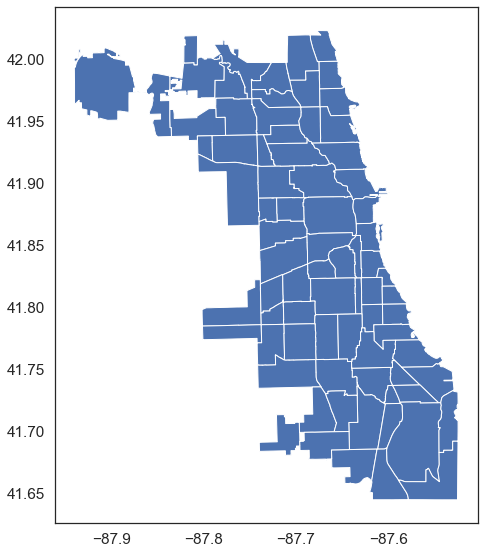

In [62]:
# Plotting basic shape of the map
fig,ax = plt.subplots(figsize = (8,8))
street_map.plot(ax=ax);

In [63]:
# init Coordinate Reference Systems
crs = {'init': 'epsg:4326'}

# Converting Latitude and Longitude to geo points
geo = [Point(xy) for xy in zip(train_df['longitude'], train_df['latitude'])]
# Creating a GeoDataFrame for train data
geo_df = gpd.GeoDataFrame(train_df, crs=crs, geometry=geo)

In [64]:
# Preparing station locations to be plotted
station = {'station': ['Station1', 'Station2'], 'geometry': [Point(-87.933,41.995), Point(-87.752,41.786)]}
# Creating GeoDataFrame for weather station data
geo_stn = gpd.GeoDataFrame(station, crs=crs)

In [65]:
# Converting Latitude and Longitude to geo points
geo_m = [Point(xy) for xy in zip(market_df['longitude'], market_df['latitude'])]
# Creating a GeoDataFrame for train data
geo_market = gpd.GeoDataFrame(market_df, crs=crs, geometry=geo_m)

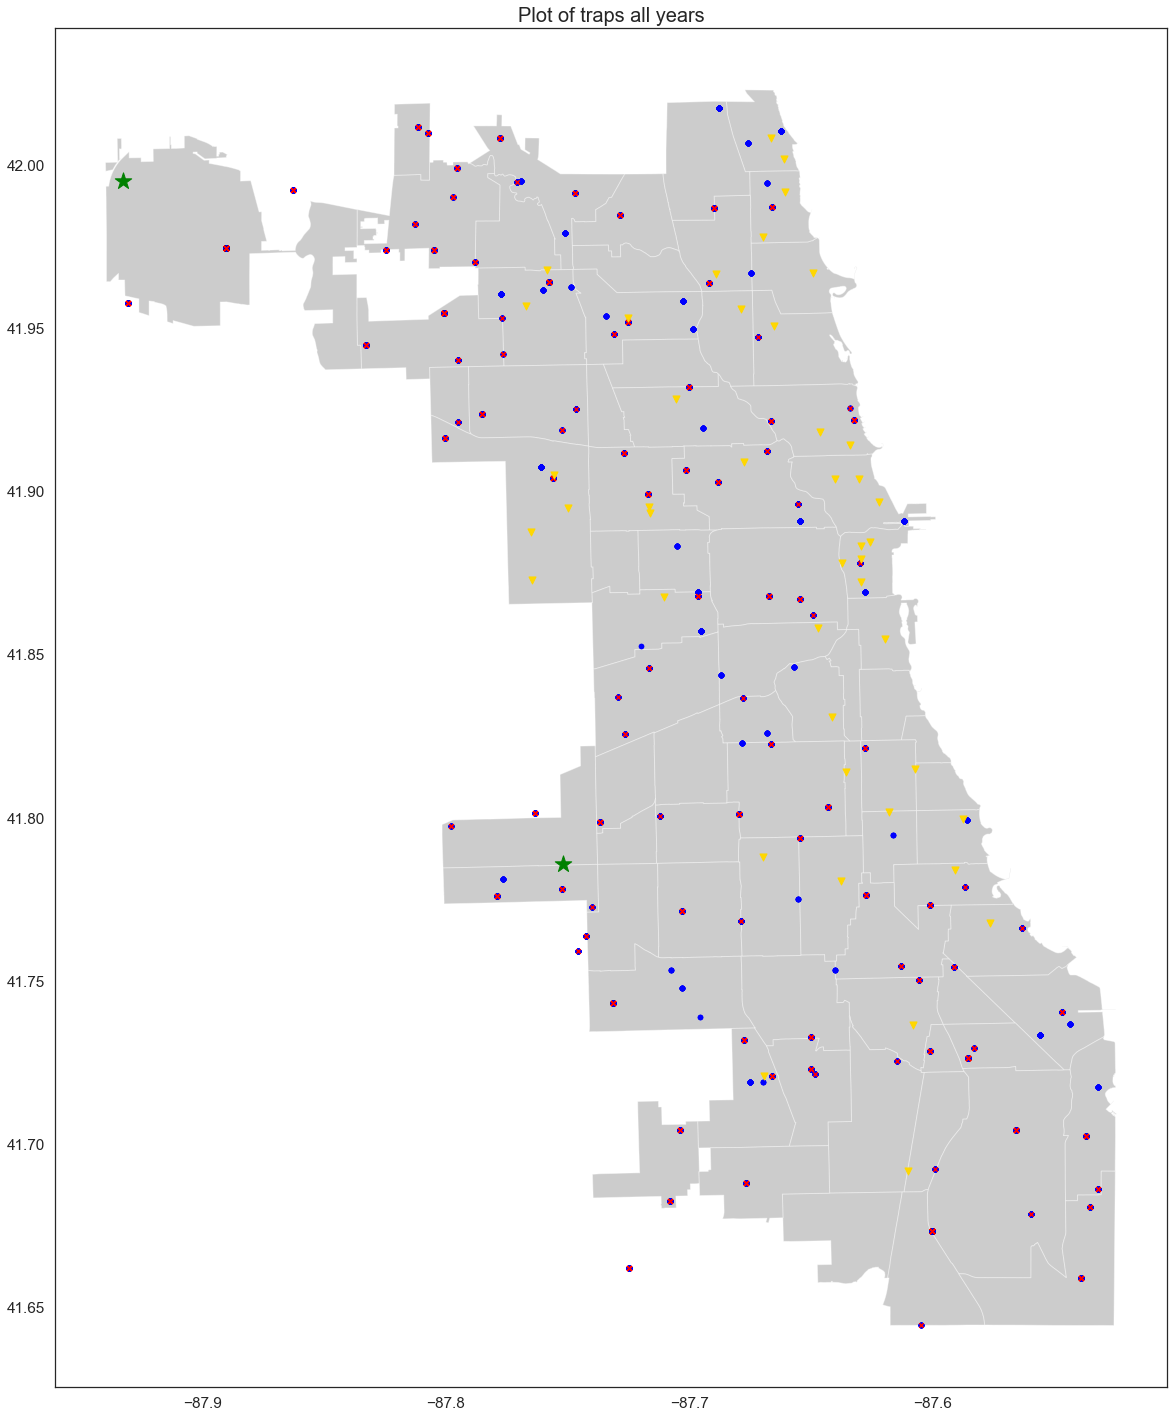

In [66]:
# Plotting the postive and negative classes & market into the map
fig,ax = plt.subplots(figsize = (20,20))
street_map.plot(ax=ax, alpha = 0.4, color = 'grey')
geo_df[geo_df['wnvpresent']==0].plot(ax=ax, markersize=20, color='blue',marker='o', label='MNV Neg')
geo_df[geo_df['wnvpresent']==1].plot(ax=ax, markersize=20, color='red',marker='x', label='MNV Pos')
geo_market.plot(ax=ax, markersize=50, color='gold',marker='v', label='Market')
geo_stn.plot(ax=ax, markersize=300, color='green', marker='*', label='Weather staions');
plt.title('Plot of traps all years', fontdict={'fontsize':20})
#plt.legend();
plt.savefig('../images/trapsallyearswithfarmermarkets.png', transparent=True)

Not much can be seen from the geospatial data, the traps are spread out sporadically and MNV positives are also everywhere.

However, by inputting Farmer Market geolocations, it can be seen that there are not enough traps near the farmer markets. With all Farmer Markets open during from Apr to Oct, I would believe that markets are areas where birds and humans would gather, especially in the summer, thereby drawing mosquitoes, and more traps can be placed in these locations.

In 2007, about 50% of the cases centered around Aug. 2009 has about 25% cases started as early as May. In 2011, the cases were spread across 3 months starting from Jun.  While in 2013, 50% of the cases happened during Jul.

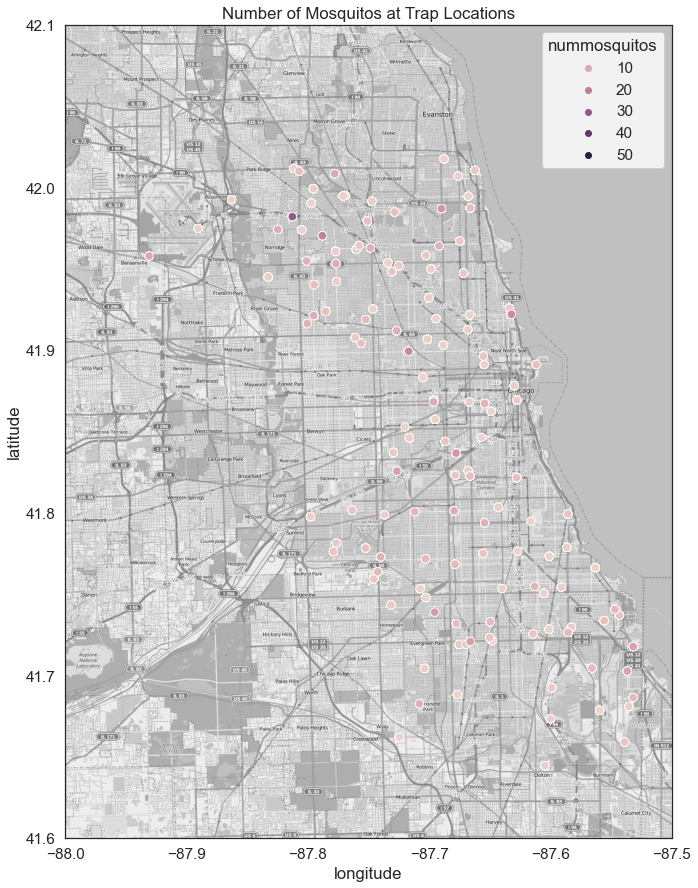

In [67]:
# Plotting trap locations
mapdata = np.loadtxt("../assets/mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv('../assets/train.csv')[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

          
plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations = traps[['Longitude', 'Latitude']].drop_duplicates().values

# plt.scatter(locations[:,0], locations[:,1], marker='x')
ax = sns.scatterplot(x='longitude', y='latitude', hue='nummosquitos', data=train_df, s=70); 
                    
legend_labels, _= ax.get_legend_handles_labels()

plt.title("Number of Mosquitos at Trap Locations");

# Add this when copying to a script on Kaggle:
#plt.savefig('heatmap.png')

According to the data, the traps were mostly set along Latitude of 41.72 to 41.98.

#### Spray Data

In [68]:
# looking at spray dataset
spray_df.head(10)

date        time   latitude  longitude
0  2011-08-29  6:56:58 PM  42.391623 -88.089163
1  2011-08-29  6:57:08 PM  42.391348 -88.089163
2  2011-08-29  6:57:18 PM  42.391022 -88.089157
3  2011-08-29  6:57:28 PM  42.390637 -88.089158
4  2011-08-29  6:57:38 PM  42.390410 -88.088858
5  2011-08-29  6:57:48 PM  42.390395 -88.088315
6  2011-08-29  6:57:58 PM  42.390673 -88.088002
7  2011-08-29  6:58:08 PM  42.391027 -88.088002
8  2011-08-29  6:58:18 PM  42.391403 -88.088003
9  2011-08-29  6:58:28 PM  42.391718 -88.087995

In [69]:
#checking spray data for corrupted or null values
spray_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       14835 non-null  object 
 1   time       14251 non-null  object 
 2   latitude   14835 non-null  float64
 3   longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [70]:
# checking for null values
spray_df.isnull().sum().sort_values(ascending = False)

time         584
date           0
latitude       0
longitude      0
dtype: int64

In [71]:
# looking at null values
spray_df[spray_df["time"].isna()]

date time   latitude  longitude
1030  2011-09-07  NaN  41.987092 -87.794286
1031  2011-09-07  NaN  41.987620 -87.794382
1032  2011-09-07  NaN  41.988004 -87.794574
1033  2011-09-07  NaN  41.988292 -87.795486
1034  2011-09-07  NaN  41.988100 -87.796014
...          ...  ...        ...        ...
1609  2011-09-07  NaN  41.995876 -87.811615
1610  2011-09-07  NaN  41.995972 -87.810271
1611  2011-09-07  NaN  41.995684 -87.810319
1612  2011-09-07  NaN  41.994724 -87.810415
1613  2011-09-07  NaN  41.993092 -87.810415

[584 rows x 4 columns]

In [72]:
# looking at the current shape of spray df
spray_df.shape

(14835, 4)

In [73]:
# If we choose to drop the rows where there is no time, we will be losing 4% of the data
584/14835 * 100

3.936636332996293

In [74]:
# Decided to just drop the data
spray_df.dropna(inplace = True)

In [75]:
# checking after dropping values
spray_df.head()

date        time   latitude  longitude
0  2011-08-29  6:56:58 PM  42.391623 -88.089163
1  2011-08-29  6:57:08 PM  42.391348 -88.089163
2  2011-08-29  6:57:18 PM  42.391022 -88.089157
3  2011-08-29  6:57:28 PM  42.390637 -88.089158
4  2011-08-29  6:57:38 PM  42.390410 -88.088858

In [76]:
# checking shape
spray_df.shape

(14251, 4)

In [77]:
# checking for null values
spray_df.isnull().sum().sort_values(ascending = False)

date         0
time         0
latitude     0
longitude    0
dtype: int64

In [78]:
# dropping any duplicates
spray_df.drop_duplicates(inplace=True)

In [79]:
# checking shape
spray_df.shape

(13710, 4)

In [80]:
# converting object into datetime data type
spray_df['date_1'] = pd.to_datetime(spray_df['date'])

In [81]:
# converting object into datetime data type
spray_df['time_1'] = pd.to_datetime(spray_df['time'])

In [82]:
# looking at spray info
spray_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13710 entries, 0 to 14834
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       13710 non-null  object        
 1   time       13710 non-null  object        
 2   latitude   13710 non-null  float64       
 3   longitude  13710 non-null  float64       
 4   date_1     13710 non-null  datetime64[ns]
 5   time_1     13710 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(2)
memory usage: 749.8+ KB


In [83]:
# Converting spray locations into geo points
geo_s = [Point(xy) for xy in zip(spray_df['longitude'], spray_df['latitude'])]
# Creating GeoDataFrame for spray data
geo_spray = gpd.GeoDataFrame(spray_df, crs=crs, geometry=geo_s)

In [84]:
# checking df
spray_df.head()

date        time   latitude  longitude     date_1  \
0  2011-08-29  6:56:58 PM  42.391623 -88.089163 2011-08-29   
1  2011-08-29  6:57:08 PM  42.391348 -88.089163 2011-08-29   
2  2011-08-29  6:57:18 PM  42.391022 -88.089157 2011-08-29   
3  2011-08-29  6:57:28 PM  42.390637 -88.089158 2011-08-29   
4  2011-08-29  6:57:38 PM  42.390410 -88.088858 2011-08-29   

               time_1                    geometry  
0 2021-08-12 18:56:58  POINT (-88.08916 42.39162)  
1 2021-08-12 18:57:08  POINT (-88.08916 42.39135)  
2 2021-08-12 18:57:18  POINT (-88.08916 42.39102)  
3 2021-08-12 18:57:28  POINT (-88.08916 42.39064)  
4 2021-08-12 18:57:38  POINT (-88.08886 42.39041)

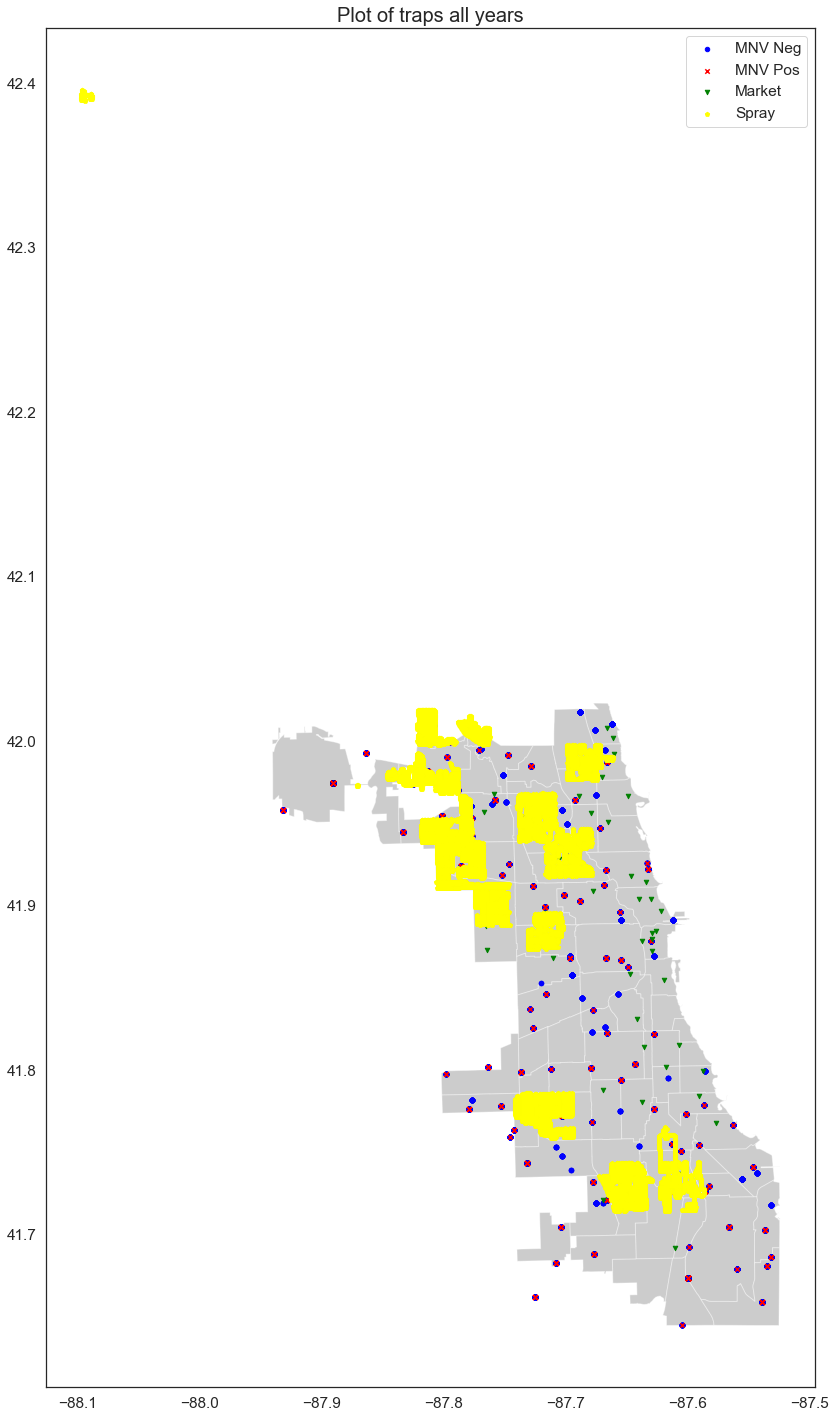

In [85]:
# Plotting the postive and negative classes, spray and market into the map
fig,ax = plt.subplots(figsize = (20,20))
street_map.plot(ax=ax, alpha = 0.4, color = 'grey')
geo_df[geo_df['wnvpresent']==0].plot(ax=ax, markersize=20, color='blue',marker='o', label='MNV Neg')
geo_df[geo_df['wnvpresent']==1].plot(ax=ax, markersize=20, color='red',marker='x', label='MNV Pos')
geo_market.plot(ax=ax, markersize=20, color='green',marker='v', label='Market')
geo_spray.plot(ax=ax, markersize=20, color='yellow',marker='p', label='Spray')
plt.title('Plot of traps all years', fontdict={'fontsize':20})
plt.legend();

Seems like there is some corrupted value in the spray dataset. Especially at > 42.3 latitude

In [86]:
# feature engineering for spray
spray_df['year'] = (spray_df['date_1'].dt.strftime('%Y')).astype(int)

In [87]:
spray_df['year'] == 2011

0         True
1         True
2         True
3         True
4         True
         ...  
14830    False
14831    False
14832    False
14833    False
14834    False
Name: year, Length: 13710, dtype: bool

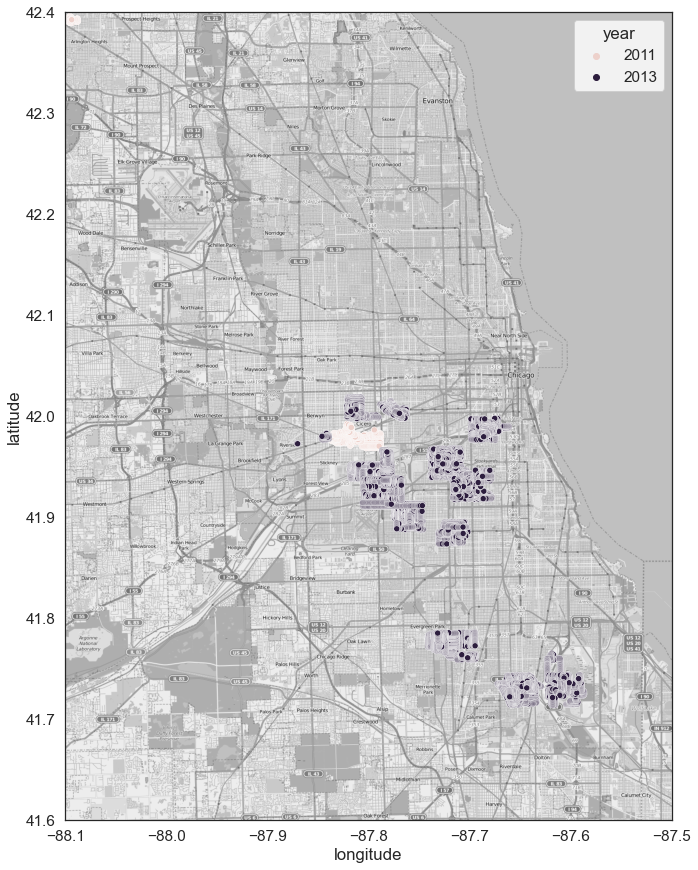

In [88]:
# visualizing spray data
mapdata = np.loadtxt("../assets/mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv('../assets/train.csv')[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

#aspect = mapdata.shape[0] * 1 / mapdata.shape[1]
aspect = 1
lon_lat_box = (-88.1, -87.5, 41.6, 42.4)

plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations = train_df[['longitude', 'latitude']].drop_duplicates().values

#plt.scatter(locations[:,0], locations[:,1], marker='x')
ax = sns.scatterplot(x='longitude', y='latitude', hue='year', data=spray_df);  

The spraying exercise only started in 2011 and was at limited areas. In 2013, data shows that the spray has extended to a much larger vicinity however might not have fully covered the infected zones.

In [89]:
#spray_df = spray_df[spray_df['latitude'] < 42.2]
#spray_df.drop(['latitude'] > 42.1, inplace = True)
spray_df = spray_df[spray_df['latitude'] < 42.1].copy()

In [90]:
spray_df[spray_df['latitude'] > 42.1]

Empty DataFrame
Columns: [date, time, latitude, longitude, date_1, time_1, geometry, year]
Index: []

In [91]:
# Converting spray locations into geo points
geo_s = [Point(xy) for xy in zip(spray_df['longitude'], spray_df['latitude'])]
# Creating GeoDataFrame for spray data
geo_spray = gpd.GeoDataFrame(spray_df, crs=crs, geometry=geo_s)

In [92]:
# Spraying over the years
spray_2007 = spray_df[spray_df['year'] == 2007]
spray_2009 = spray_df[spray_df['year'] == 2009]
spray_2011 = spray_df[spray_df['year'] == 2011]
spray_2013 = spray_df[spray_df['year'] == 2013]

In [93]:
spray_2011.head()

date        time   latitude  longitude     date_1  \
95  2011-09-07  7:52:52 PM  41.981433 -87.787777 2011-09-07   
96  2011-09-07  7:53:02 PM  41.980998 -87.787778 2011-09-07   
97  2011-09-07  7:53:12 PM  41.980560 -87.787762 2011-09-07   
98  2011-09-07  7:53:22 PM  41.980198 -87.787758 2011-09-07   
99  2011-09-07  7:53:32 PM  41.979752 -87.787765 2011-09-07   

                time_1                    geometry  year  
95 2021-08-12 19:52:52  POINT (-87.78778 41.98143)  2011  
96 2021-08-12 19:53:02  POINT (-87.78778 41.98100)  2011  
97 2021-08-12 19:53:12  POINT (-87.78776 41.98056)  2011  
98 2021-08-12 19:53:22  POINT (-87.78776 41.98020)  2011  
99 2021-08-12 19:53:32  POINT (-87.78776 41.97975)  2011

In [94]:
def geo_converter(dataframe):
    # Converting spray locations into geo points
    geo_s = [Point(xy) for xy in zip(dataframe['longitude'], dataframe['latitude'])]
    # Creating GeoDataFrame for spray data
    return gpd.GeoDataFrame(dataframe, crs=crs, geometry=geo_s)

In [95]:
geo_spray_2007 = geo_converter(spray_2007)
geo_spray_2009 = geo_converter(spray_2009)
geo_spray_2011 = geo_converter(spray_2011)
geo_spray_2013 = geo_converter(spray_2013)

In [96]:
geo_wnv_2007 = geo_converter(months_only_2007)
geo_wnv_2009 = geo_converter(months_only_2009)
geo_wnv_2011 = geo_converter(months_only_2011)
geo_wnv_2013 = geo_converter(months_only_2013)

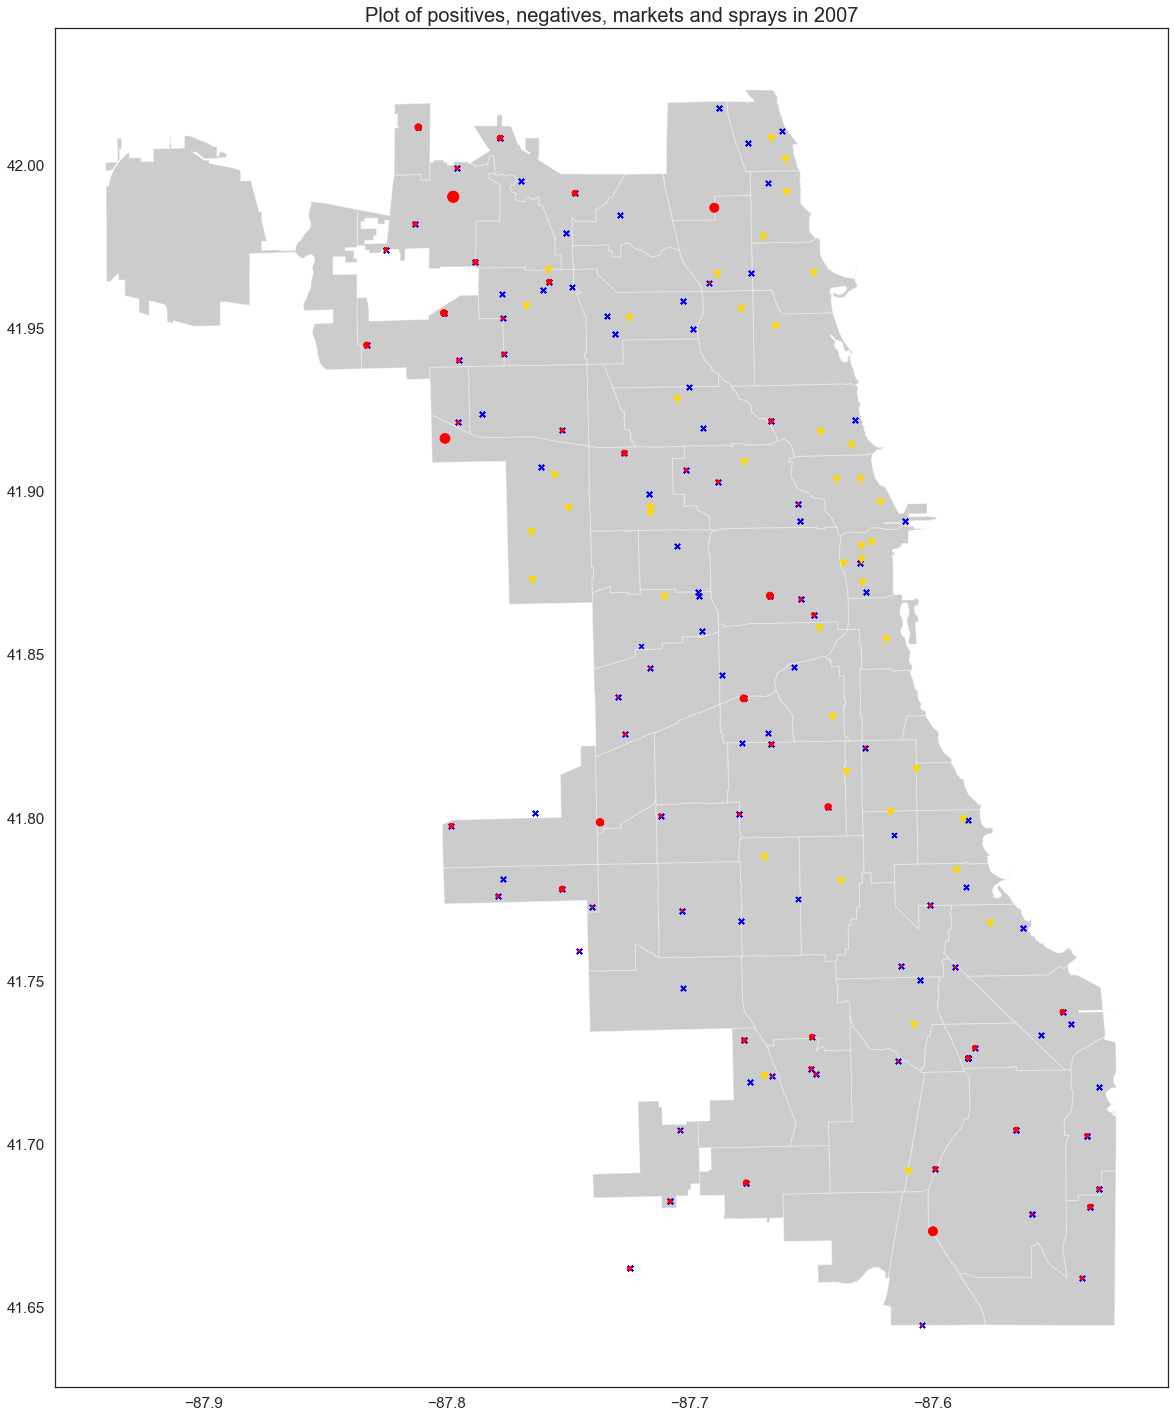

In [97]:
# Plotting the postive and negative classes in 2007 and spray data into the map
fig,ax = plt.subplots(figsize = (20,20))
street_map.plot(ax=ax, alpha = 0.4, color = 'grey')
geo_spray_2007.plot(ax=ax, markersize=20, color='yellow',marker='p', label='Spray')
geo_wnv_2007[geo_wnv_2007['wnvpresent']==0].plot(ax=ax, markersize= 20, color='blue',marker='x', label='MNV Neg')
geo_wnv_2007[geo_wnv_2007['wnvpresent']==1].plot(ax=ax, markersize= geo_wnv_2007['nummosquitos']*5, color='red',marker='o', 
                                     label='MNV Pos')
geo_market.plot(ax=ax, markersize=50, color='gold',marker='v', label='Market')
plt.title('Plot of positives, negatives, markets and sprays in 2007', fontdict={'fontsize':20})
#plt.legend();
plt.savefig('../images/posandnegandspray2007.png', transparent=True)

There were no sprays done in 2007, but the hot spots began at the north side of Chicago, and 1 larger cluster in the south side.

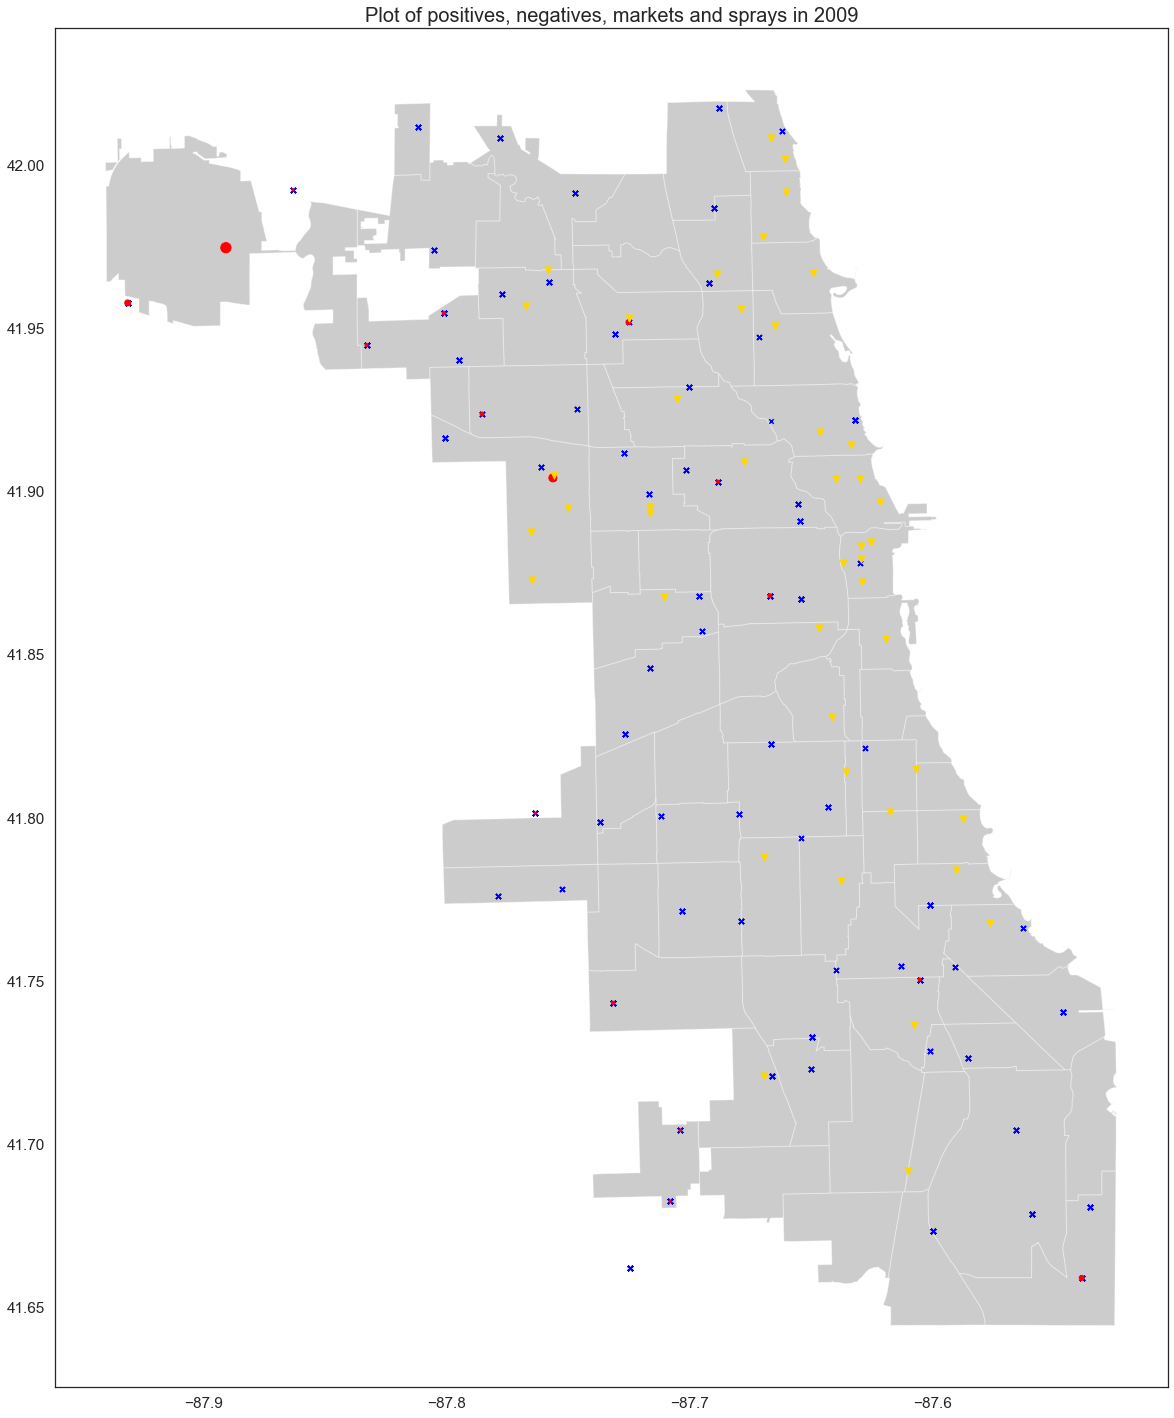

In [98]:
# Plotting the postive and negative classes in 2007 and spray data into the map
fig,ax = plt.subplots(figsize = (20,20))
street_map.plot(ax=ax, alpha = 0.4, color = 'grey')
geo_spray_2009.plot(ax=ax, markersize=20, color='yellow',marker='p', label='Spray')
geo_wnv_2009[geo_wnv_2009['wnvpresent']==0].plot(ax=ax, markersize= 20, color='blue',marker='x', label='MNV Neg')
geo_wnv_2009[geo_wnv_2009['wnvpresent']==1].plot(ax=ax, markersize= geo_wnv_2009['nummosquitos']*5, color='red',marker='o', 
                                     label='MNV Pos')
geo_market.plot(ax=ax, markersize=50, color='gold',marker='v', label='Market')
plt.title('Plot of positives, negatives, markets and sprays in 2009', fontdict={'fontsize':20})
#plt.legend();
plt.savefig('../images/posandnegandspray2009.png', transparent=True)

In 2009, there were also no sprays and clusters were small, with a cluster at the north west, which is O'hare International airport.

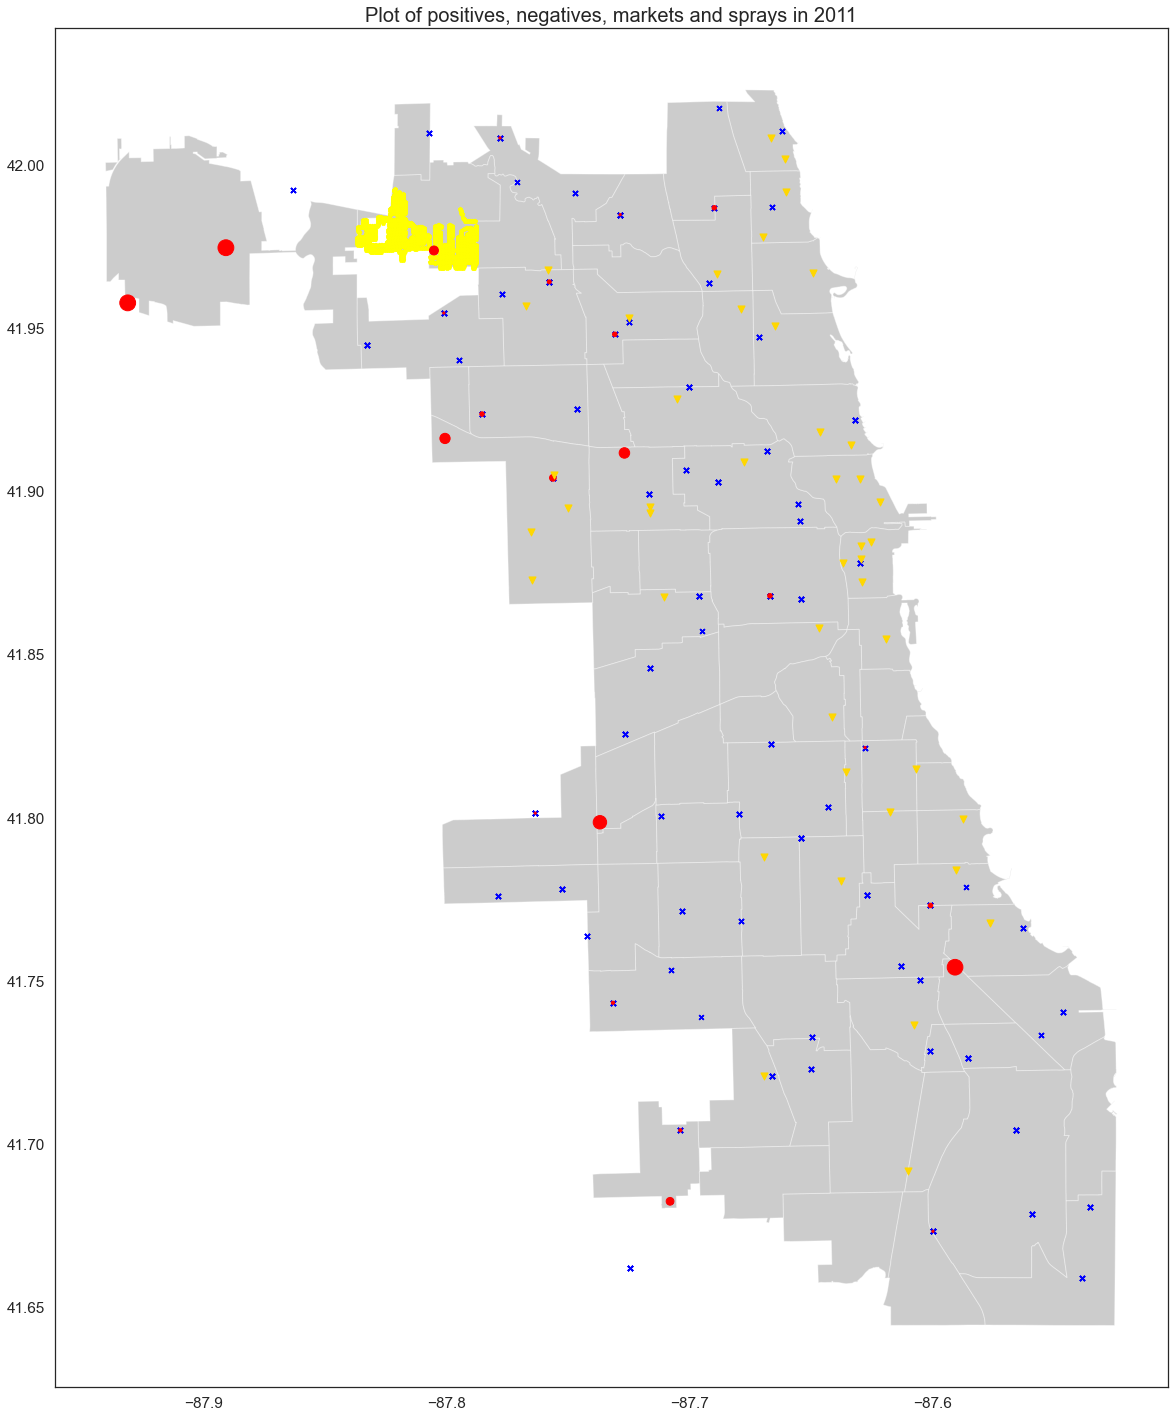

In [99]:
# Plotting the postive and negative classes in 2007 and spray data into the map
fig,ax = plt.subplots(figsize = (20,20))
street_map.plot(ax=ax, alpha = 0.4, color = 'grey')
geo_spray_2011.plot(ax=ax, markersize=20, color='yellow',marker='p', label='Spray')
geo_wnv_2011[geo_wnv_2011['wnvpresent']==0].plot(ax=ax, markersize= 20, color='blue',marker='x', label='MNV Neg')
geo_wnv_2011[geo_wnv_2011['wnvpresent']==1].plot(ax=ax, markersize= geo_wnv_2011['nummosquitos']*5, color='red',marker='o', 
                                     label='MNV Pos')
geo_market.plot(ax=ax, markersize=50, color='gold',marker='v', label='Market')
plt.title('Plot of positives, negatives, markets and sprays in 2011', fontdict={'fontsize':20})
#plt.legend();
plt.savefig('../images/posandnegandspray2011.png', transparent=True)

In 2011, there was some spraying in the city, but not focused on the clusters.

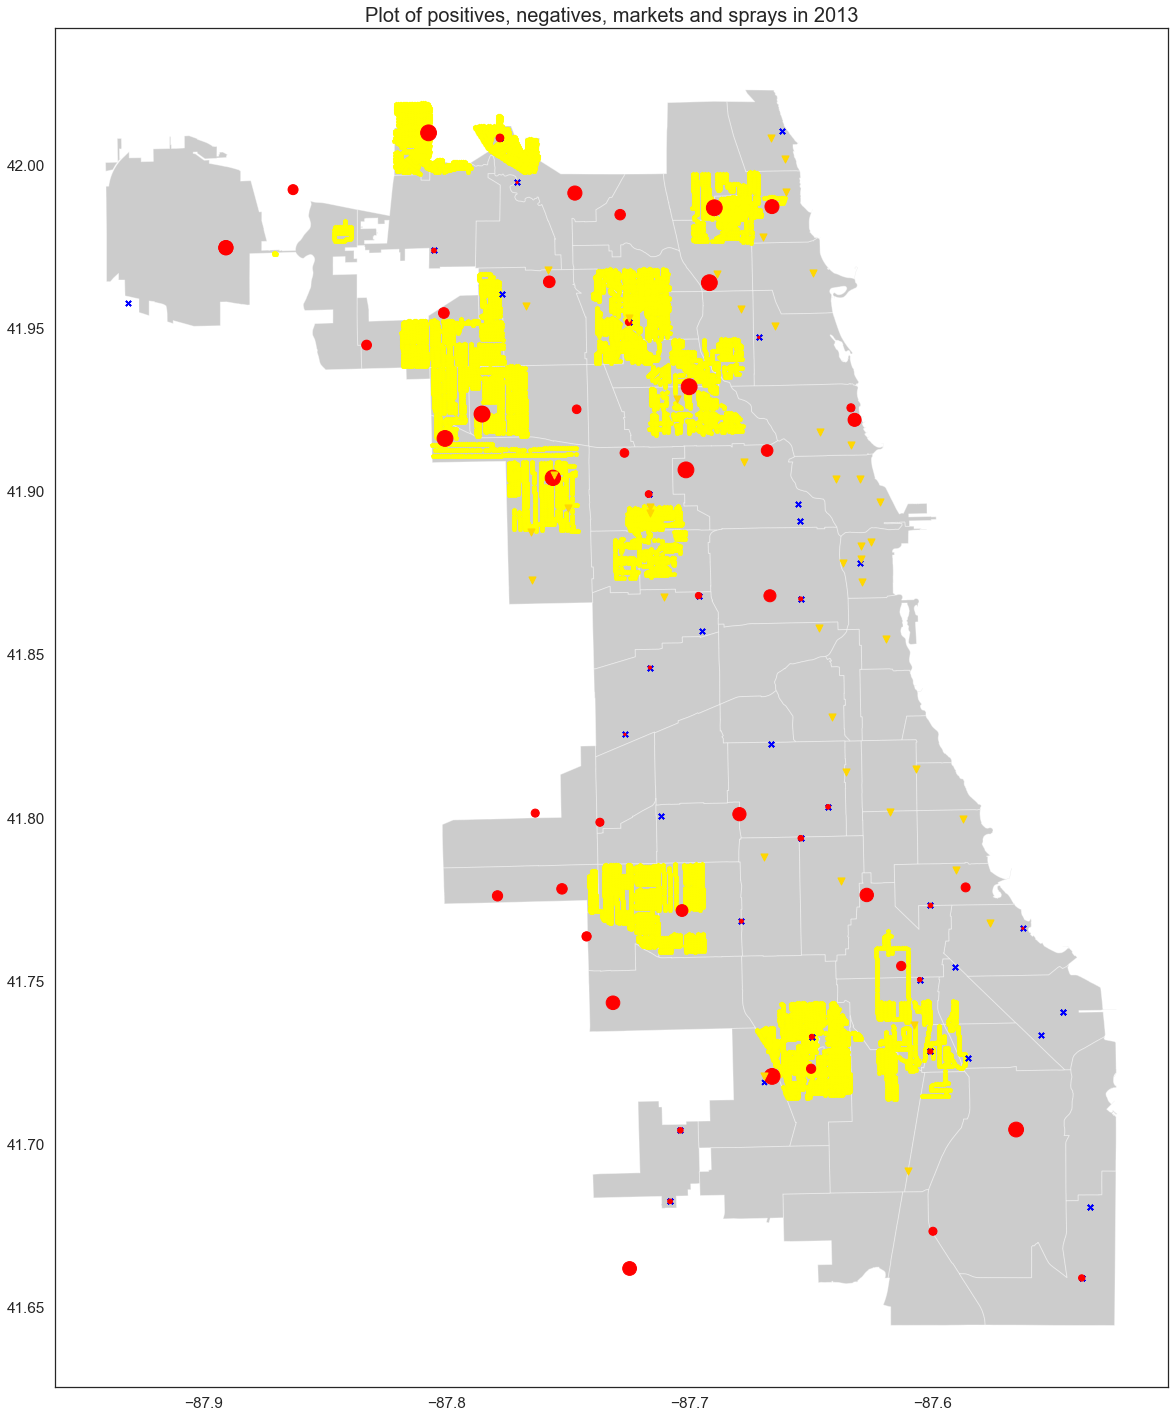

In [100]:
# Plotting the postive and negative classes in 2013 and spray data into the map
fig,ax = plt.subplots(figsize = (20,20))
street_map.plot(ax=ax, alpha = 0.4, color = 'grey')
geo_spray_2013.plot(ax=ax, markersize=20, color='yellow',marker='p', label='Spray')
geo_wnv_2013[geo_wnv_2013['wnvpresent']==0].plot(ax=ax, markersize= 20, color='blue',marker='x', label='MNV Neg')
geo_wnv_2013[geo_wnv_2013['wnvpresent']==1].plot(ax=ax, markersize= geo_wnv_2013['nummosquitos']*5, color='red',marker='o', 
                                     label='MNV Pos')
geo_market.plot(ax=ax, markersize=50, color='gold',marker='v', label='Market')
plt.title('Plot of positives, negatives, markets and sprays in 2013', fontdict={'fontsize':20})
#plt.legend();
plt.savefig('../images/posandnegandspray2013.png', transparent=True)

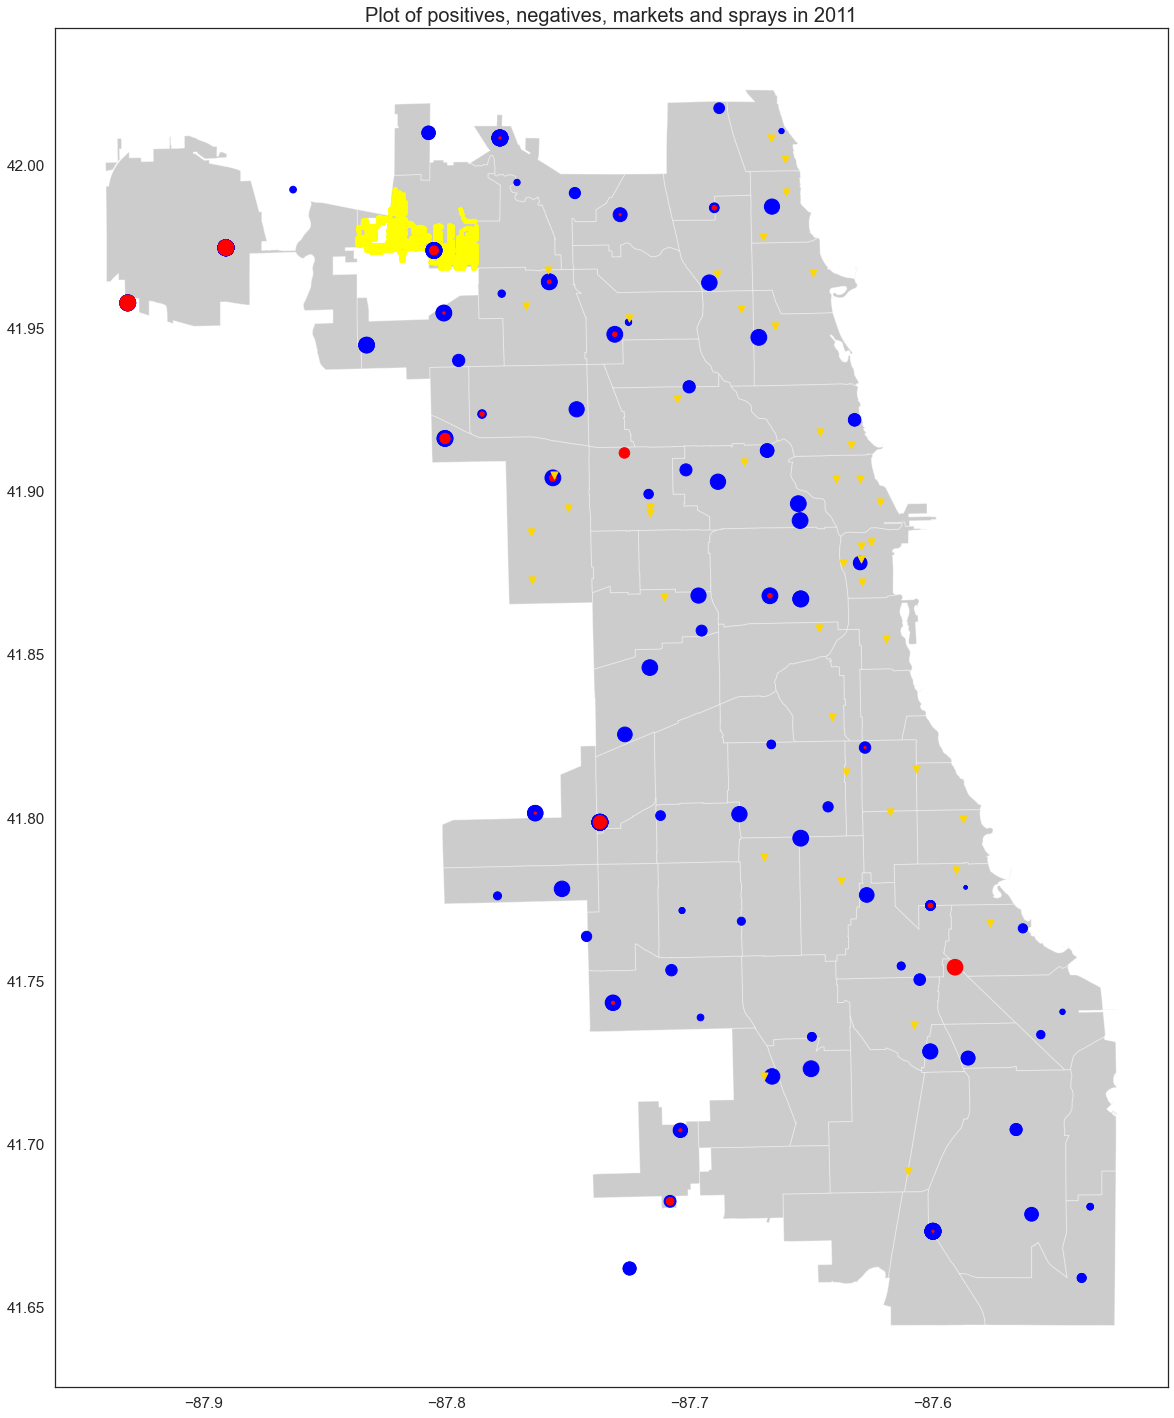

In [101]:
# Plotting the postive and negative classes in 2007 and spray data into the map
fig,ax = plt.subplots(figsize = (20,20))
street_map.plot(ax=ax, alpha = 0.4, color = 'grey')
geo_spray_2011.plot(ax=ax, markersize=20, color='yellow',marker='p', label='Spray')
geo_wnv_2011[geo_wnv_2011['wnvpresent']==0].plot(ax=ax, markersize= geo_wnv_2011['nummosquitos']*5, color='blue',marker='o', label='MNV Neg')
geo_wnv_2011[geo_wnv_2011['wnvpresent']==1].plot(ax=ax, markersize= geo_wnv_2011['nummosquitos']*5, color='red',marker='o', 
                                     label='MNV Pos')
geo_market.plot(ax=ax, markersize=50, color='gold',marker='v', label='Market')
plt.title('Plot of positives, negatives, markets and sprays in 2011', fontdict={'fontsize':20})
#plt.legend();
plt.savefig('../images/nummosandspray2011.png', transparent=True)

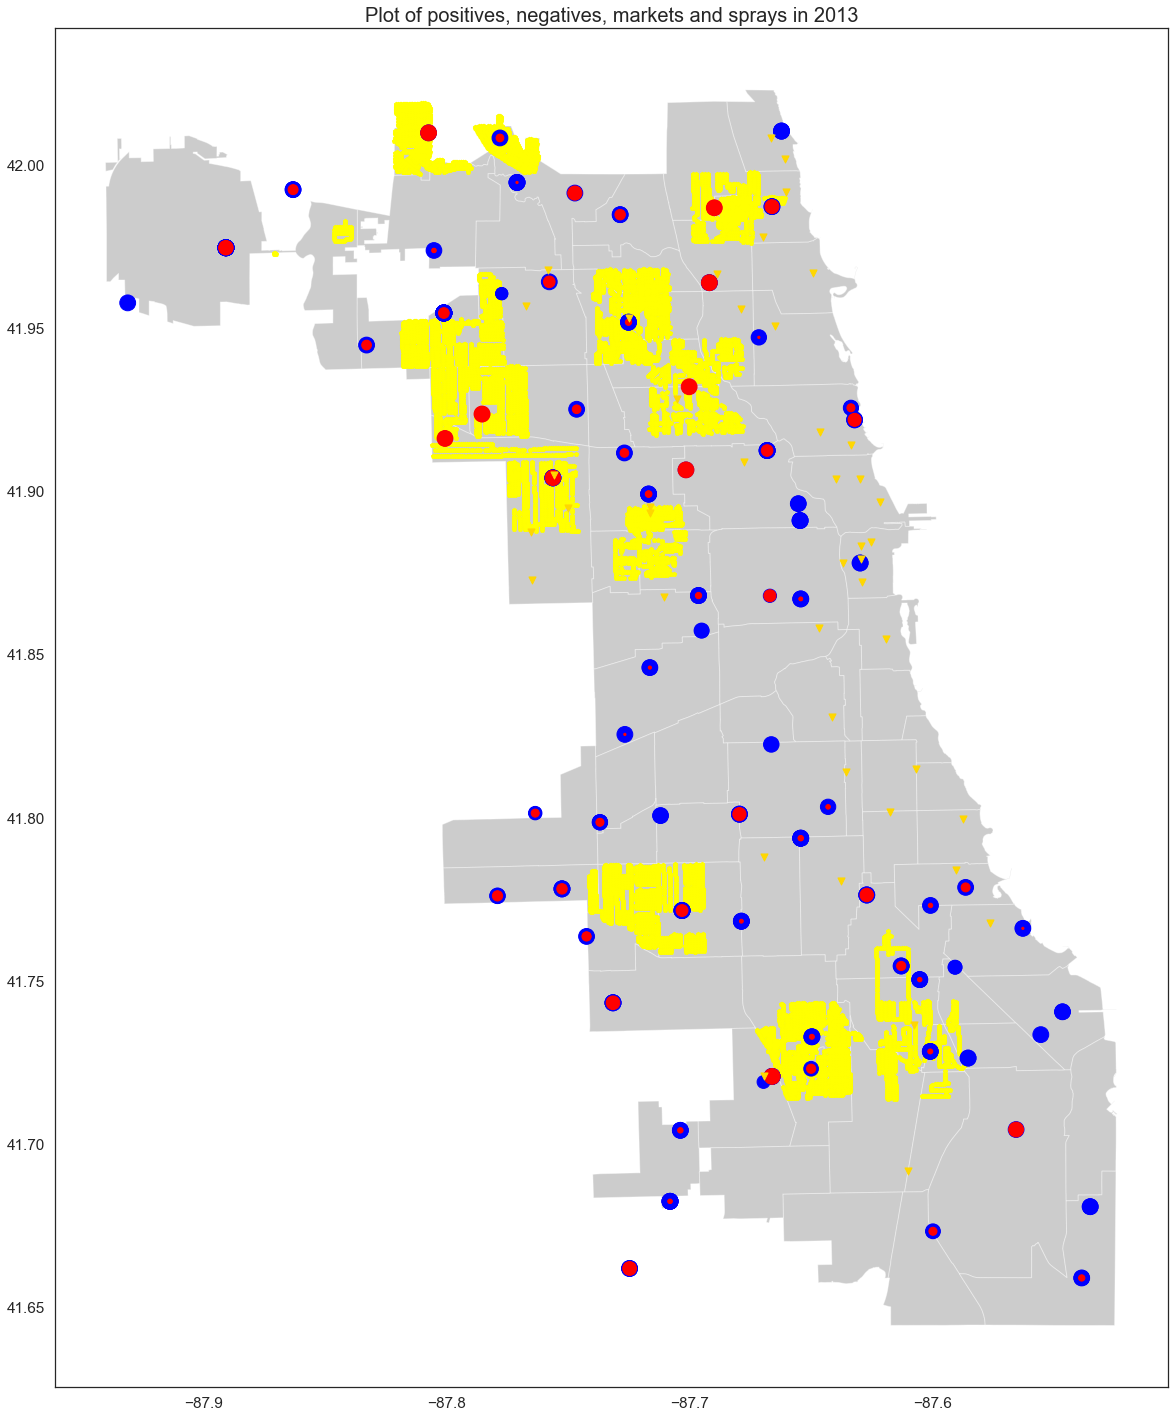

In [102]:
# Plotting the postive and negative classes in 2013 and spray data into the map
fig,ax = plt.subplots(figsize = (20,20))
street_map.plot(ax=ax, alpha = 0.4, color = 'grey')
geo_spray_2013.plot(ax=ax, markersize=20, color='yellow',marker='p', label='Spray')
geo_wnv_2013[geo_wnv_2013['wnvpresent']==0].plot(ax=ax, markersize= geo_wnv_2013['nummosquitos']*5, color='blue',marker='o', label='MNV Neg')
geo_wnv_2013[geo_wnv_2013['wnvpresent']==1].plot(ax=ax, markersize= geo_wnv_2013['nummosquitos']*5, color='red',marker='o', 
                                     label='MNV Pos')
geo_market.plot(ax=ax, markersize=50, color='gold',marker='v', label='Market')
plt.title('Plot of positives, negatives, markets and sprays in 2013', fontdict={'fontsize':20})
#plt.legend();
plt.savefig('../images/nummosandspray2013.png', transparent=True)

The 2013 graph shows that the city has started spray exercise but only in certain locations.
Most notably, the international airport was not sprayed even though the cluster has been there since 2009.

Unfortunately, from the map figure, we are unable to tell when the spray was administered. Was it before the cluster grew or was it after.

As there are many clusters to look at, I will just focus on one, located at between 41.95 and 41.92 by between -87.73 and -87.7.
I want to see the efficacy of the spray on mosquito count and WNV count.

In [103]:
months_only_2013[months_only_2013['latitude'] == 41.92]

Empty DataFrame
Columns: [date, address, species, block, street, trap, addressnumberandstreet, latitude, longitude, addressaccuracy, nummosquitos, wnvpresent, date_1, month, year, geometry]
Index: []

In [104]:
focused_df = months_only_2013.loc[(months_only_2013['latitude'] < 41.95) & (months_only_2013['latitude'] > 41.92) & (months_only_2013['longitude'] > -87.73) & (months_only_2013['longitude'] < -87.7)]
focused_df

date                                            address  \
8219  2013-06-14  2800 North Francisco Avenue, Chicago, IL 60618...   
8335  2013-06-21  2800 North Francisco Avenue, Chicago, IL 60618...   
8442  2013-06-27  2800 North Francisco Avenue, Chicago, IL 60618...   
8443  2013-06-27  2800 North Francisco Avenue, Chicago, IL 60618...   
8573  2013-07-08  2800 North Francisco Avenue, Chicago, IL 60618...   
8574  2013-07-08  2800 North Francisco Avenue, Chicago, IL 60618...   
8706  2013-07-12  2800 North Francisco Avenue, Chicago, IL 60618...   
8707  2013-07-12  2800 North Francisco Avenue, Chicago, IL 60618...   
8882  2013-07-19  2800 North Francisco Avenue, Chicago, IL 60618...   
8883  2013-07-19  2800 North Francisco Avenue, Chicago, IL 60618...   
9064  2013-07-25  2800 North Francisco Avenue, Chicago, IL 60618...   
9065  2013-07-25  2800 North Francisco Avenue, Chicago, IL 60618...   
9219  2013-08-01  2800 North Francisco Avenue, Chicago, IL 60618...   
9220  2013-08-01  2800 North Francisco Avenue, Chicago, IL 60618...   
9221  2013-08-01  2800 North Francisco Avenue, Chicago, IL 60618...   
9408  2013-08-08  2800 North Francisco Avenue, Chicago, IL 60618...   
9589  2013-08-15  2800 North Francisco Avenue, Chicago, IL 60618...   
9747  2013-08-22  2800 North Francisco Avenue, Chicago, IL 60618...   
9908  2013-08-29  2800 North Francisco Avenue, Chicago, IL 60618...   
9909  2013-08-29  2800 North Francisco Avenue, Chicago, IL 60618...   
10192 2013-09-12  2800 North Francisco Avenue, Chicago, IL 60618...   
10193 2013-09-12  2800 North Francisco Avenue, Chicago, IL 60618...   
10194 2013-09-12  2800 North Francisco Avenue, Chicago, IL 60618...   
10327 2013-09-19  2800 North Francisco Avenue, Chicago, IL 60618...   

                      species  block            street  trap  \
8219           CULEX RESTUANS     28   N FRANCISCO AVE  T147   
8335           CULEX RESTUANS     28   N FRANCISCO AVE  T147   
8442   CULEX PIPIENS/RESTUANS     28   N FRANCISCO AVE  T147   
8443           CULEX RESTUANS     28   N FRANCISCO AVE  T147   
8573   CULEX PIPIENS/RESTUANS     28   N FRANCISCO AVE  T147   
8574           CULEX RESTUANS     28   N FRANCISCO AVE  T147   
8706   CULEX PIPIENS/RESTUANS     28   N FRANCISCO AVE  T147   
8707           CULEX RESTUANS     28   N FRANCISCO AVE  T147   
8882   CULEX PIPIENS/RESTUANS     28   N FRANCISCO AVE  T147   
8883           CULEX RESTUANS     28   N FRANCISCO AVE  T147   
9064   CULEX PIPIENS/RESTUANS     28   N FRANCISCO AVE  T147   
9065           CULEX RESTUANS     28   N FRANCISCO AVE  T147   
9219   CULEX PIPIENS/RESTUANS     28   N FRANCISCO AVE  T147   
9220           CULEX RESTUANS     28   N FRANCISCO AVE  T147   
9221            CULEX PIPIENS     28   N FRANCISCO AVE  T147   
9408            CULEX PIPIENS     28   N FRANCISCO AVE  T147   
9589   CULEX PIPIENS/RESTUANS     28   N FRANCISCO AVE  T147   
9747            CULEX PIPIENS     28   N FRANCISCO AVE  T147   
9908   CULEX PIPIENS/RESTUANS     28   N FRANCISCO AVE  T147   
9909           CULEX RESTUANS     28   N FRANCISCO AVE  T147   
10192  CULEX PIPIENS/RESTUANS     28   N FRANCISCO AVE  T147   
10193          CULEX RESTUANS     28   N FRANCISCO AVE  T147   
10194           CULEX PIPIENS     28   N FRANCISCO AVE  T147   
10327           CULEX PIPIENS     28   N FRANCISCO AVE  T147   

                   addressnumberandstreet   latitude  longitude  \
8219   2800  N FRANCISCO AVE, Chicago, IL  41.932094 -87.700117   
8335   2800  N FRANCISCO AVE, Chicago, IL  41.932094 -87.700117   
8442   2800  N FRANCISCO AVE, Chicago, IL  41.932094 -87.700117   
8443   2800  N FRANCISCO AVE, Chicago, IL  41.932094 -87.700117   
8573   2800  N FRANCISCO AVE, Chicago, IL  41.932094 -87.700117   
8574   2800  N FRANCISCO AVE, Chicago, IL  41.932094 -87.700117   
8706   2800  N FRANCISCO AVE, Chicago, IL  41.932094 -87.700117   
8707   2800  N FRANCISCO AVE, Chicago, IL  41.932094 -87.700117   
8882   2800  N FRANCISCO AVE, Ch

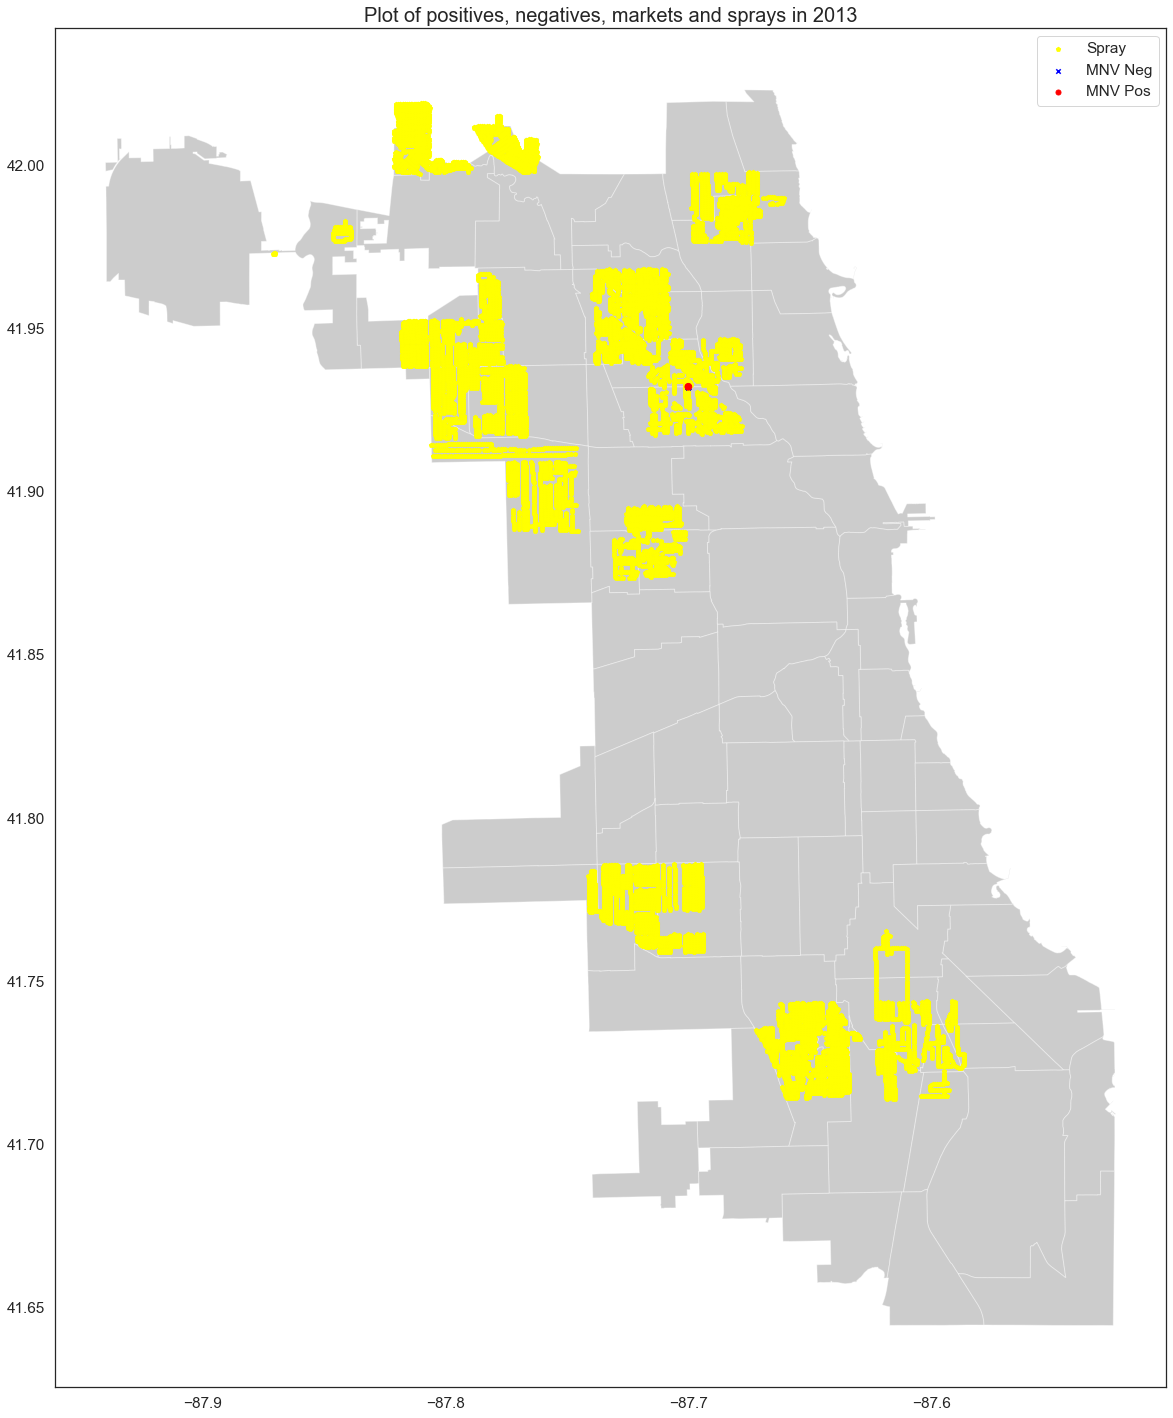

In [105]:
# Isolated study on location
focused_df_geo = geo_converter(focused_df)
fig,ax = plt.subplots(figsize = (20,20))
street_map.plot(ax=ax, alpha = 0.4, color = 'grey')
geo_spray_2013.plot(ax=ax, markersize=20, color='yellow',marker='p', label='Spray')
focused_df_geo[focused_df_geo['wnvpresent']==0].plot(ax=ax, markersize= 20, color='blue',marker='x', label='MNV Neg')
focused_df_geo[focused_df_geo['wnvpresent']==1].plot(ax=ax, markersize= focused_df_geo['nummosquitos']*5, color='red',marker='o', 
                                     label='MNV Pos')
#geo_market.plot(ax=ax, markersize=20, color='green',marker='v', label='Market')
plt.title('Plot of positives, negatives, markets and sprays in 2013', fontdict={'fontsize':20})
plt.legend();

In [106]:
focused_df_spray = spray_2013.loc[(spray_2013['latitude'] < 41.95) & (spray_2013['latitude'] > 41.92) & (spray_2013['longitude'] > -87.76) & (spray_2013['longitude'] < -87.6)]
focused_df_spray

date         time   latitude  longitude     date_1  \
4434  2013-07-25   8:56:26 PM  41.949425 -87.737900 2013-07-25   
4435  2013-07-25   8:56:36 PM  41.948975 -87.737873 2013-07-25   
4436  2013-07-25   8:56:46 PM  41.948507 -87.738012 2013-07-25   
4437  2013-07-25   8:57:16 PM  41.947700 -87.737185 2013-07-25   
4438  2013-07-25   8:57:36 PM  41.948292 -87.736658 2013-07-25   
...          ...          ...        ...        ...        ...   
7208  2013-08-08  10:16:34 PM  41.926570 -87.714508 2013-08-08   
7209  2013-08-08  10:16:44 PM  41.926563 -87.713815 2013-08-08   
7210  2013-08-08  10:16:54 PM  41.926653 -87.713518 2013-08-08   
7211  2013-08-08  10:17:04 PM  41.927038 -87.713513 2013-08-08   
7212  2013-08-08  10:17:14 PM  41.927482 -87.713525 2013-08-08   

                  time_1                    geometry  year  
4434 2021-08-12 20:56:26  POINT (-87.73790 41.94942)  2013  
4435 2021-08-12 20:56:36  POINT (-87.73787 41.94897)  2013  
4436 2021-08-12 20:56:46  POINT (-87.73801 41.94851)  2013  
4437 2021-08-12 20:57:16  POINT (-87.73718 41.94770)  2013  
4438 2021-08-12 20:57:36  POINT (-87.73666 41.94829)  2013  
...                  ...                         ...   ...  
7208 2021-08-12 22:16:34  POINT (-87.71451 41.92657)  2013  
7209 2021-08-12 22:16:44  POINT (-87.71381 41.92656)  2013  
7210 2021-08-12 22:16:54  POINT (-87.71352 41.92665)  2013  
7211 2021-08-12 22:17:04  POINT (-87.71351 41.92704)  2013  
7212 2021-08-12 22:17:14  POINT (-87.71353 41.92748)  2013  

[1604 rows x 8 columns]

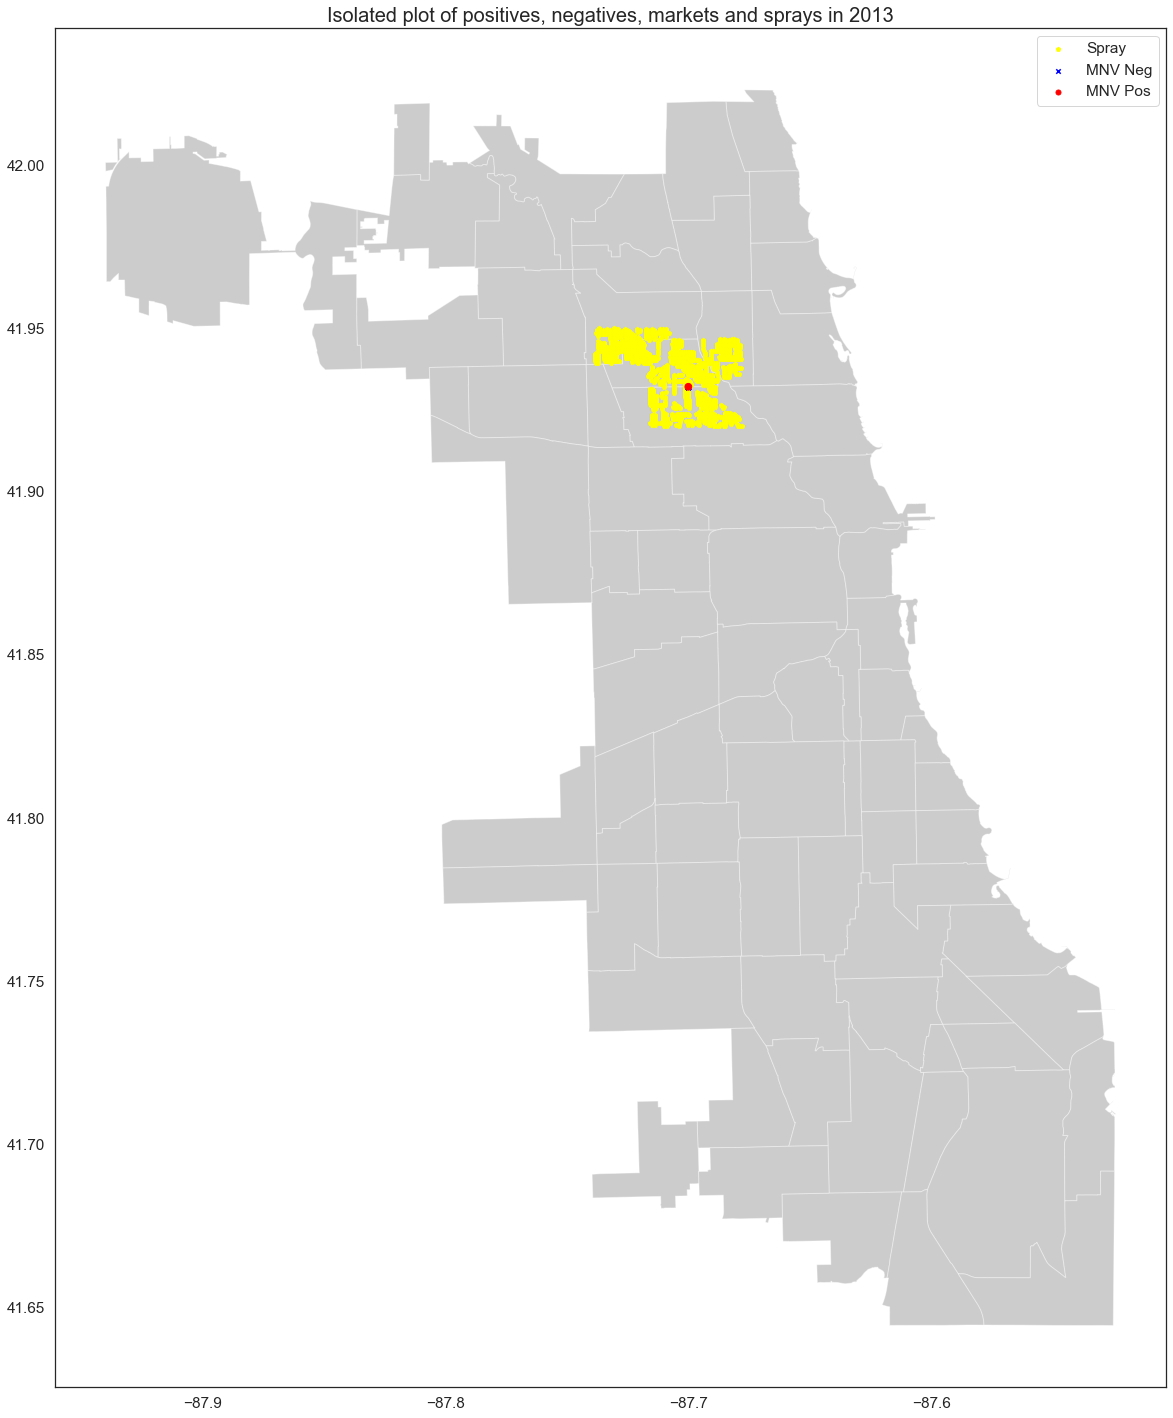

In [107]:
# Isolated study on location
focused_df_spray = geo_converter(focused_df_spray)
fig,ax = plt.subplots(figsize = (20,20))
street_map.plot(ax=ax, alpha = 0.4, color = 'grey')
focused_df_spray.plot(ax=ax, markersize=20, color='yellow',marker='p', label='Spray')
focused_df_geo[focused_df_geo['wnvpresent']==0].plot(ax=ax, markersize= 20, color='blue',marker='x', label='MNV Neg')
focused_df_geo[focused_df_geo['wnvpresent']==1].plot(ax=ax, markersize= focused_df_geo['nummosquitos']*5, color='red',marker='o', 
                                     label='MNV Pos')
#geo_market.plot(ax=ax, markersize=20, color='green',marker='v', label='Market')
plt.title('Isolated plot of positives, negatives, markets and sprays in 2013', fontdict={'fontsize':20})
plt.legend();
plt.savefig('../images/posandnegandspray2013isolated.png')

In [108]:
# looking at focused df
focused_df.head()

date                                            address  \
8219 2013-06-14  2800 North Francisco Avenue, Chicago, IL 60618...   
8335 2013-06-21  2800 North Francisco Avenue, Chicago, IL 60618...   
8442 2013-06-27  2800 North Francisco Avenue, Chicago, IL 60618...   
8443 2013-06-27  2800 North Francisco Avenue, Chicago, IL 60618...   
8573 2013-07-08  2800 North Francisco Avenue, Chicago, IL 60618...   

                     species  block            street  trap  \
8219          CULEX RESTUANS     28   N FRANCISCO AVE  T147   
8335          CULEX RESTUANS     28   N FRANCISCO AVE  T147   
8442  CULEX PIPIENS/RESTUANS     28   N FRANCISCO AVE  T147   
8443          CULEX RESTUANS     28   N FRANCISCO AVE  T147   
8573  CULEX PIPIENS/RESTUANS     28   N FRANCISCO AVE  T147   

                  addressnumberandstreet   latitude  longitude  \
8219  2800  N FRANCISCO AVE, Chicago, IL  41.932094 -87.700117   
8335  2800  N FRANCISCO AVE, Chicago, IL  41.932094 -87.700117   
8442  2800  N FRANCISCO AVE, Chicago, IL  41.932094 -87.700117   
8443  2800  N FRANCISCO AVE, Chicago, IL  41.932094 -87.700117   
8573  2800  N FRANCISCO AVE, Chicago, IL  41.932094 -87.700117   

      addressaccuracy  nummosquitos  wnvpresent     date_1  month  year  \
8219                8             9           0 2013-06-14      6  2013   
8335                8             1           0 2013-06-21      6  2013   
8442                8             6           0 2013-06-27      6  2013   
8443                8             1           0 2013-06-27      6  2013   
8573                8             2           0 2013-07-08      7  2013   

                        geometry  
8219  POINT (-87.70012 41.93209)  
8335  POINT (-87.70012 41.93209)  
8442  POINT (-87.70012 41.93209)  
8443  POINT (-87.70012 41.93209)  
8573  POINT (-87.70012 41.93209)

In [109]:
# looking at shape for amount of datapoints
focused_df.shape

(24, 16)

In [110]:
# looking at isolated spray data
focused_df_spray.head()

date        time   latitude  longitude     date_1  \
4434  2013-07-25  8:56:26 PM  41.949425 -87.737900 2013-07-25   
4435  2013-07-25  8:56:36 PM  41.948975 -87.737873 2013-07-25   
4436  2013-07-25  8:56:46 PM  41.948507 -87.738012 2013-07-25   
4437  2013-07-25  8:57:16 PM  41.947700 -87.737185 2013-07-25   
4438  2013-07-25  8:57:36 PM  41.948292 -87.736658 2013-07-25   

                  time_1                    geometry  year  
4434 2021-08-12 20:56:26  POINT (-87.73790 41.94942)  2013  
4435 2021-08-12 20:56:36  POINT (-87.73787 41.94897)  2013  
4436 2021-08-12 20:56:46  POINT (-87.73801 41.94851)  2013  
4437 2021-08-12 20:57:16  POINT (-87.73718 41.94770)  2013  
4438 2021-08-12 20:57:36  POINT (-87.73666 41.94829)  2013

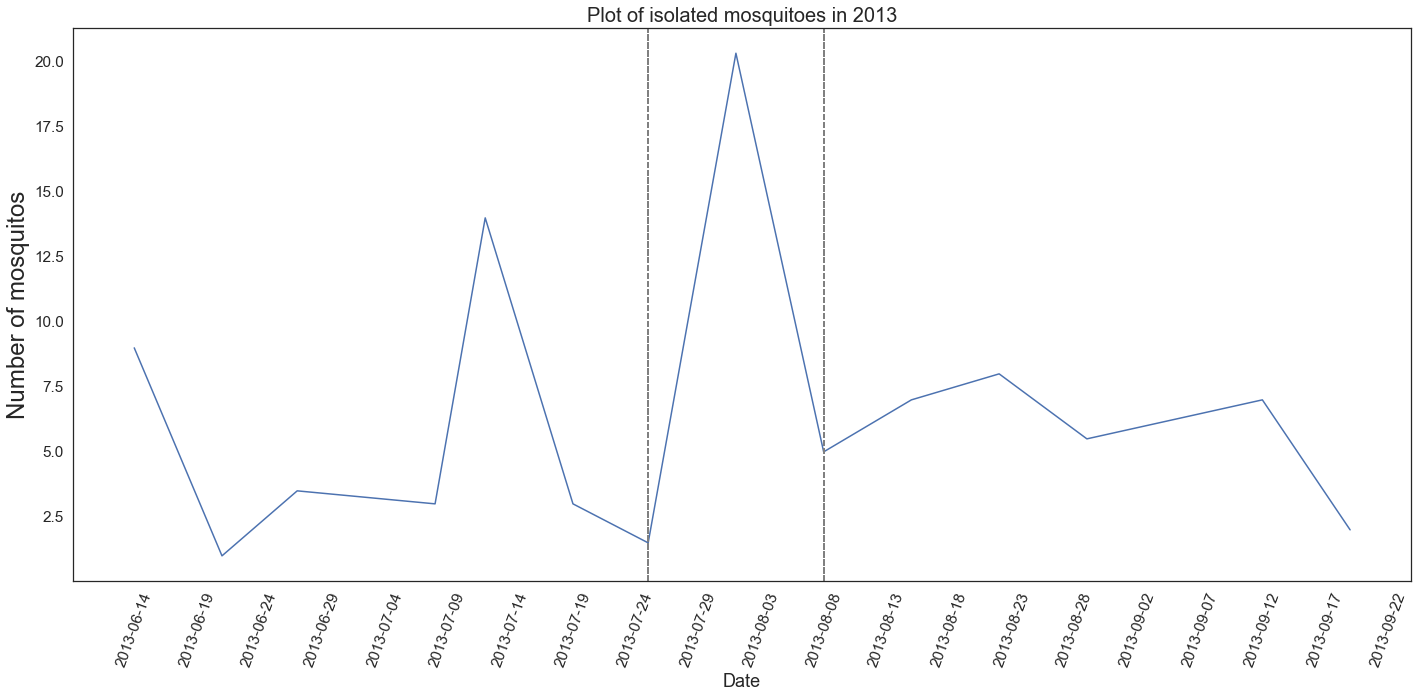

In [111]:
# Visualizing isolated spray vs mosquito count
fig,ax = plt.subplots(figsize = (20,10))
# ci = None continues aggregating data, but removes shading
sns.lineplot(x = "date_1", y = "nummosquitos", data = focused_df, ci=None)
#plt.plot("date_1", "nummosquitos", data = focused_df)
for y in focused_df_spray['date_1']:
    plt.axvline(x= y, color='grey', ls='--')
plt.title('Plot of isolated mosquitoes in 2013', fontdict={'fontsize':20})
plt.xlabel('Date', fontsize=18)
plt.xticks(rotation=70)
loc = plticker.MultipleLocator(base=5.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.ylabel('Number of mosquitos', fontsize=24)
plt.savefig('../images/linegraph2013isolated.png')

It can be seen that the sprays cause mosquito counts to spike unfortunately, before it crashes. The mosquito population will only crash 1 week later.

## Save the Clean Datasets

In [112]:
train_df['week'] = (train_df['date_1'].dt.strftime('%W')).astype(int)

In [113]:
# Define a function to concatenate the Year and Week together and convert them into integer
def year_week(row):
    week = row['week']
    year = row['year']
    row['yearweek'] = f'{year}{week}'
    row['yearweek'] = int(row['yearweek'])
    return row

In [114]:
# Define a function to concatenate the Year and month together and convert them into integer
def year_month(row):
    month = row['month']
    year = row['year']
    row['yearmonth'] = f'{year}{month}'
    row['yearmonth'] = int(row['yearmonth'])
    return row

In [115]:
# Apply the 2 functions above to our dataset
train_df = train_df.apply(year_month, axis=1)
train_df = train_df.apply(year_week, axis=1)

In [116]:
train_df.head(2)

date                                            address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  species  block           street  trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   

              addressnumberandstreet  latitude  longitude  addressaccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   

   nummosquitos  wnvpresent     date_1  month  year  \
0             1           0 2007-05-29      5  2007   
1             1           0 2007-05-29      5  2007   

                      geometry  week  yearmonth  yearweek  
0  POINT (-87.800991 41.95469)    22      20075    200722  
1  POINT (-87.800991 41.95469)    22      20075    200722

In [117]:
train_df.to_csv("../assets/train_df_cleaned.csv")
test_df.to_csv("../assets/test_df_cleaned.csv")
spray_df.to_csv("../assets/spray_df_cleaned.csv")

In [118]:
%store train_df
%store test_df
%store spray_df

Stored 'train_df' (DataFrame)
Stored 'test_df' (DataFrame)
Stored 'spray_df' (DataFrame)
